# Libraries to be installed beforing Running the code:
1) Need to install xgboost library on Anaconda Prompt.Enter this "pip install xgboost" on Anaconda Prompt


Total Compilation Time: 20 minutes

# Data Exploration

In [80]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [81]:
# Basic processing of dataframe
df = pd.read_csv("data.csv")
columns = list(df.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'Class' )
df.columns = columns
df = df.set_index("ID")

Class = df.Class
df = df.drop(['Class'], axis = 1)

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [82]:
# Obtaining information of basic descriptors
description = {}
for index, row in df.iterrows():
    description[index] = [np.mean(row), np.std(row), min(row), np.quantile(row,0.25),
                          np.median(row), np.quantile(row,0.75), max(row)]

In [83]:
descriptors = ['Mean','Standard Deviation','Min','Q1','Median','Q3','Max']

description_df = pd.DataFrame(description).transpose()
description_df.columns = descriptors
description_df = pd.concat([description_df,Class], axis=1)
description_df

,Mean,Standard Deviation,Min,Q1,Median,Q3,Max,Class
ID,,,,,,,,
X21.V1.791,-16.910112,95.710958,-281.0,-78.50,-11.5,49.75,229.0,4
X15.V1.924,28.112360,471.835823,-1716.0,-90.50,220.5,325.50,513.0,1
X8.V1.1,-44.044944,44.186380,-126.0,-77.75,-44.5,-15.00,80.0,5
X16.V1.60,-68.910112,15.923723,-105.0,-80.00,-69.0,-60.00,-22.0,5
X20.V1.54,-6.651685,38.693001,-103.0,-32.00,-1.0,22.75,78.0,5
...,...,...,...,...,...,...,...,...
X22.V1.114,5.157303,38.268536,-79.0,-23.00,7.5,38.00,73.0,2
X19.V1.354,5.674157,163.078548,-388.0,-92.50,27.5,103.75,471.0,1
X8.V1.28,6.752809,44.164855,-90.0,-22.00,8.5,35.00,121.0,5


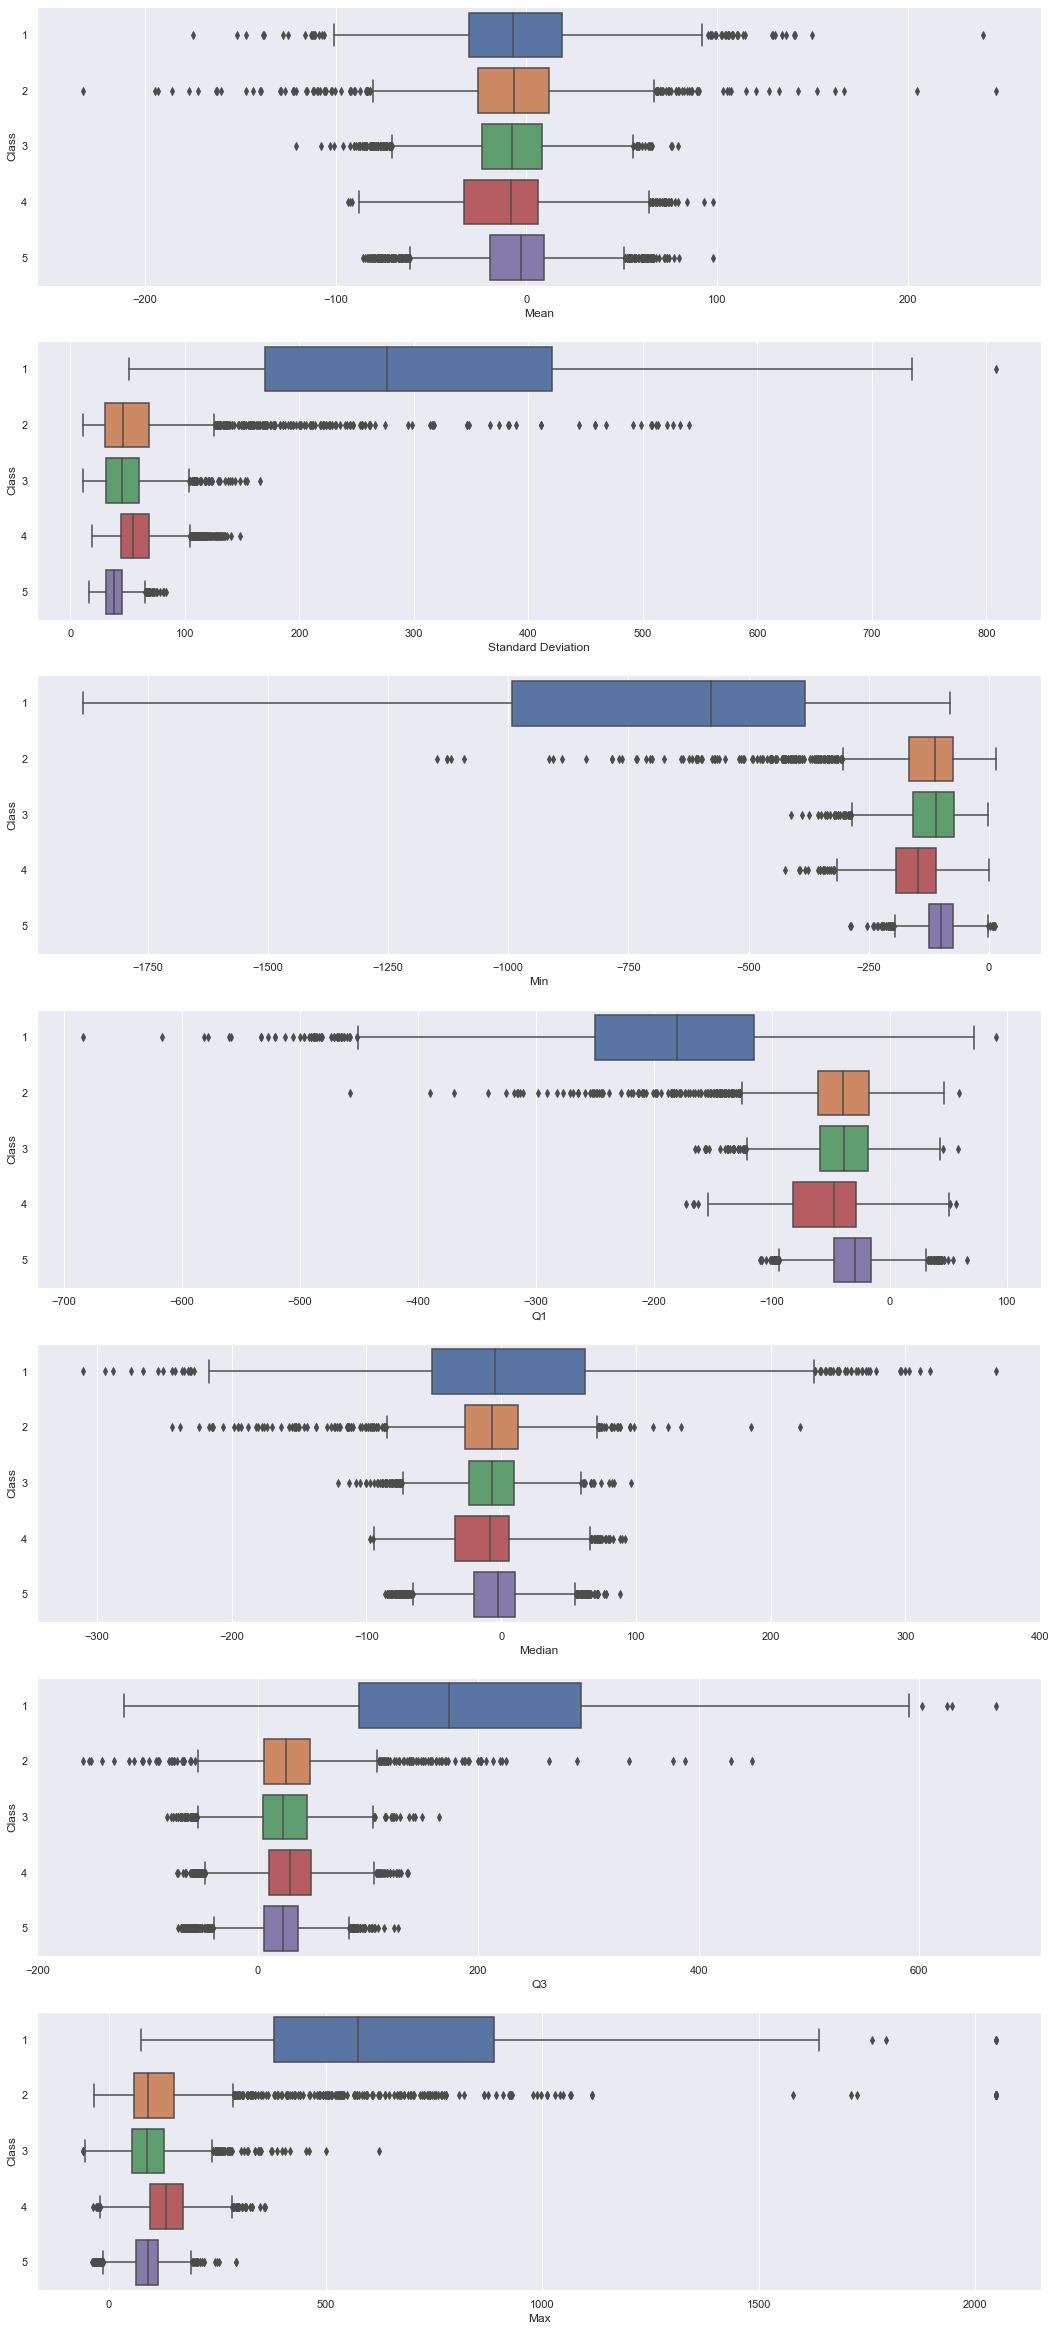

In [84]:
#Plotting basic descriptors against the classes
f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in descriptors:
    sb.boxplot(x = var, y = "Class", data = description_df, orient = "h", ax = axes[count])
    count += 1

From the boxplots above, we can see that Class 1 is significantly different from the rest of the classes. It has a much higher change in amplitude over the sampling period as compared to the other classes. This is also evident in the time series plot of the data. The rest of the data are rather indistinguishable from each other (At least from the basic descriptors) as most of boxplots look similar to each other. These data might be sufficient for a binary classification of Class 1 against the rest due to the significant differences

Note: I did not use swarmplot due to the great amount of datapoints which result in long computation time.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv (r'data.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [86]:
patient_ID = [df['Unnamed: 0'][i] for i in range(len(df))]
time_data = [None for i in range(len(df))]
for i in range(len(patient_ID)):
    position_V = patient_ID[i].index('V')
    time_data[i] = int(patient_ID[i][1:position_V-1])
    patient_ID[i] = patient_ID[i][position_V+1:]
    patient_ID[i] = patient_ID[i].replace('.','0')
    patient_ID[i] = int(patient_ID[i])

df.insert(1, 'ID', patient_ID)
df.insert(0, 'Time', time_data)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.sort_values(["y","ID","Time"])
df = df.set_index(['ID'])

Creating a list of 5 dataframes each corresponding to the unique value of y.
For example,

                                        ep[0] is dataframe with y as 1
                                        ep[1] is dataframe with y as 2
                                        ep[2] is dataframe with y as 3
                                        ep[3] is dataframe with y as 4
                                        ep[4] is dataframe with y as 5

In [87]:
ep=[]
for i in range(1,6):
    ep_1=df[df.y.isin([i])]
    ep.append(ep_1)

In [88]:
ep[1]

,Time,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,
13,1,34,33,28,22,21,22,22,19,22,...,20,20,22,17,19,19,23,18,19,2
13,2,12,2,-4,-13,0,-6,5,4,4,...,93,91,87,76,67,64,57,49,47,2
13,3,48,49,53,59,67,73,78,72,63,...,15,10,-1,-8,-8,-5,7,11,13,2
13,4,12,9,21,26,22,24,16,19,18,...,59,59,59,64,74,77,72,60,42,2
13,5,35,41,56,70,82,91,101,104,112,...,28,20,20,15,13,10,13,1,-11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,19,-73,-75,-80,-85,-87,-85,-82,-82,-80,...,35,25,21,20,8,0,-11,-12,-16,2
10993,20,-13,-20,-18,-15,-13,-14,-16,-27,-35,...,-76,-75,-73,-66,-71,-72,-75,-79,-77,2
10993,21,-68,-56,-43,-29,-27,-27,-23,-20,-29,...,-34,-39,-40,-44,-47,-42,-36,-23,-24,2


Plots for 5 datasets of the same patient

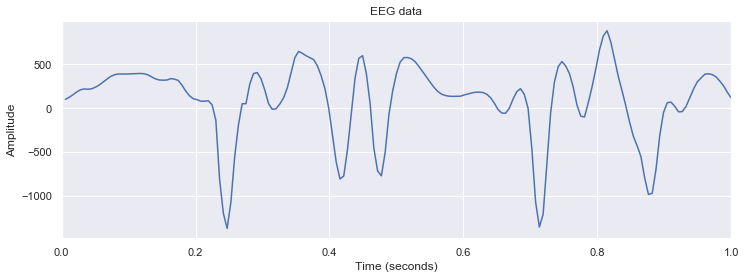

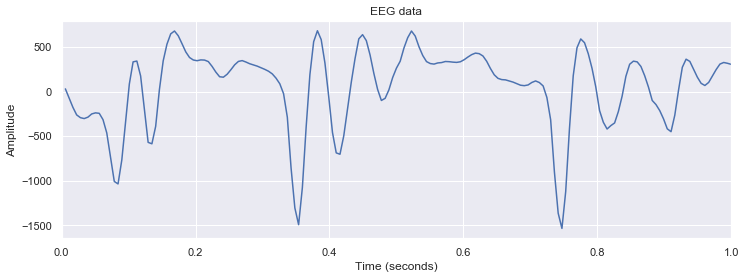

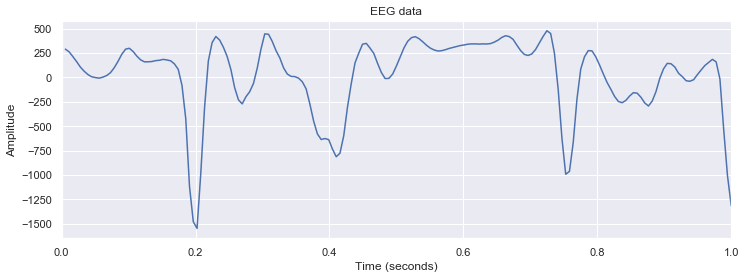

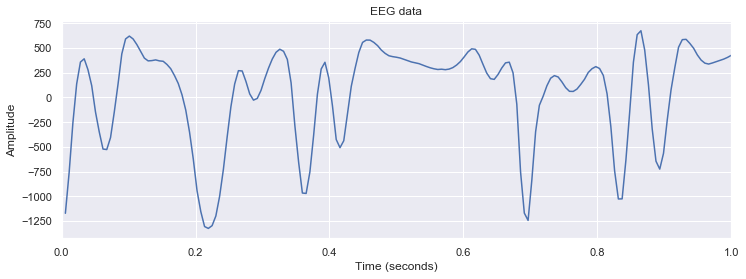

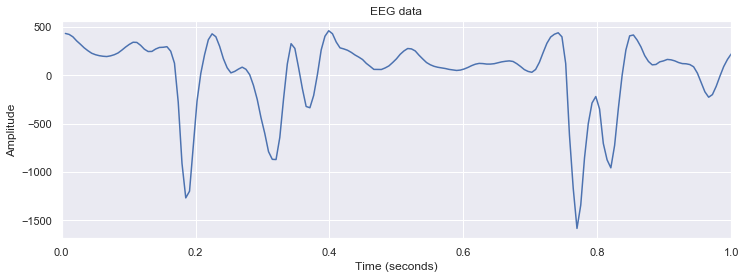

In [89]:
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

Plots for 5 datasets of the same patient on the same graph (To highlight diffenreces in phase)

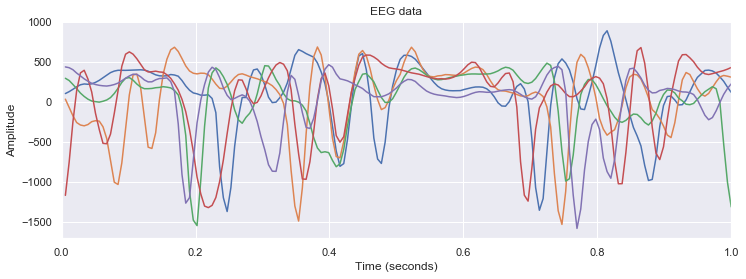

In [90]:
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([0, 1])
plt.title('EEG data')

for i in range(0,5):
    
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    plt.plot(time, x)

Plots for datasets of the 5 different patient of class 1

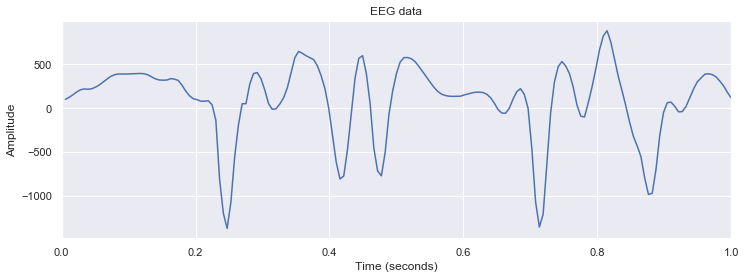

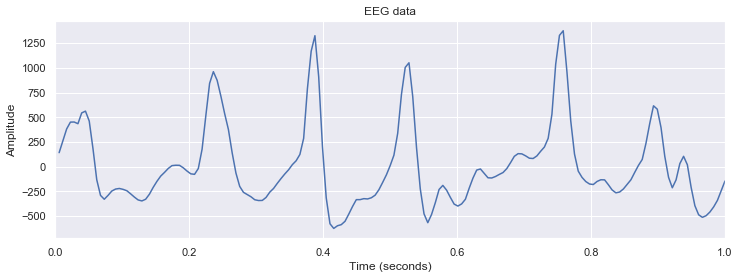

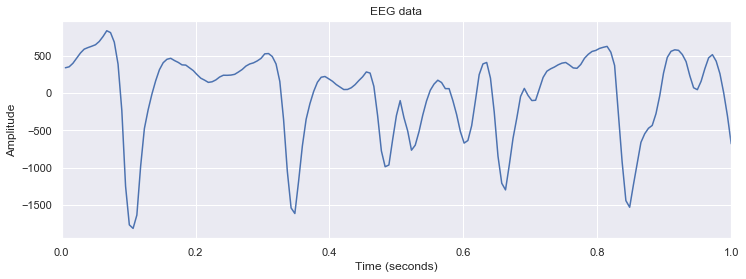

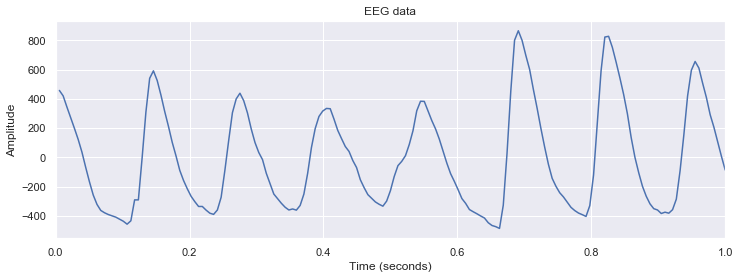

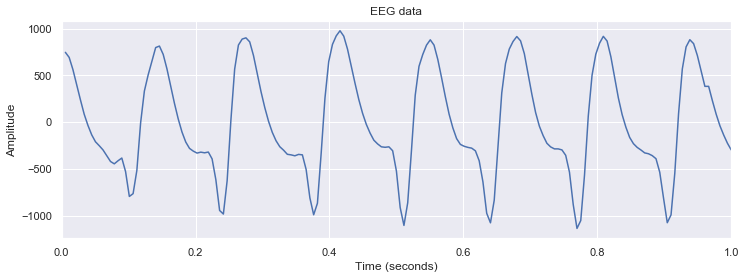

In [91]:
for i in range(0,115,23):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[0].iloc[i][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

**From this plot, we can observe that while members of class 1 have distinctly different graphs, there appears to be a regular spike/dip in each of the graphs. These occur approximately every 0.18 to 0.2s. This might be a distinct characteristic for epilepsy seizure that we can explore later on.**

From the graphs above, we can discover that while the profile of the EEG data is consistent for each patient, they are highly different from one another when compared to other patients even if they fall into the same class. Besides that, even for the same patient, we can see a noticeable phase difference. As such, machine learning algorithm might fail to capture these information.
Thus, it might be wiser to process the data in the frequency domain where such differences are taken into account.

Plots for datasets of the 5 different patient in each of the classes

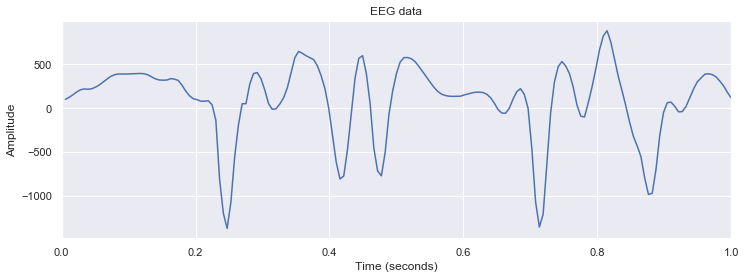

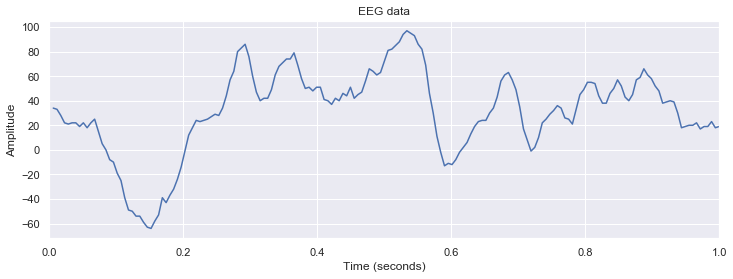

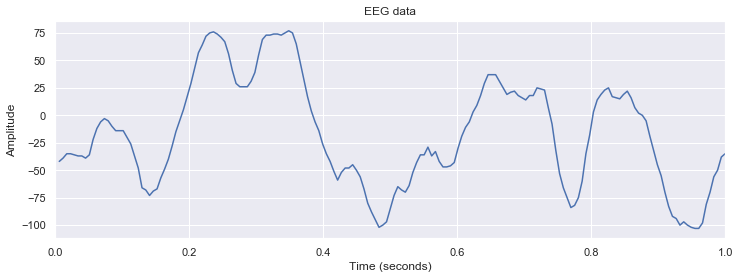

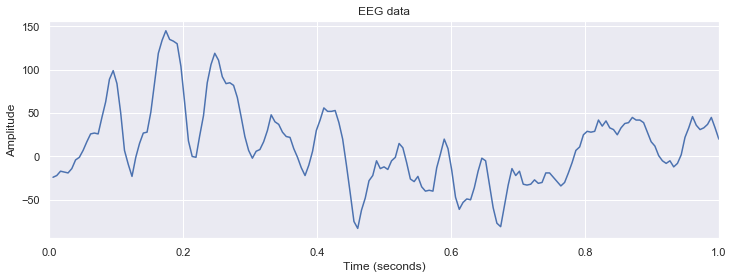

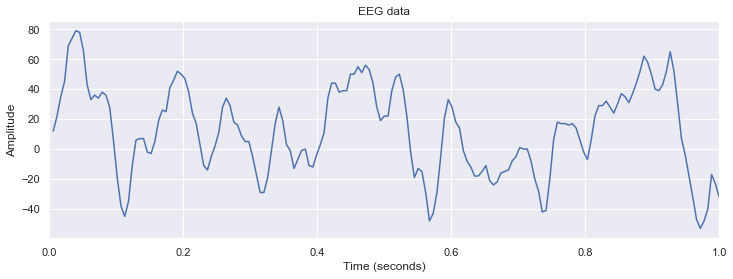

In [92]:
for i in range(0,5):
    # Define sampling frequency and time vector
    sf = 178  #Sampling frequency is 178Hz as 178 samples are taken in 1 second
    time = [i/sf for i in range(1,179)]
    
    x=ep[i].iloc[0][1:-1]
    
    # Plot the signal
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    plt.plot(time, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.title('EEG data')
    plt.show()

Simarly to analysis above, we can see distinctly different graphs when plotting each of the 5 classes. We can observe that class 1 seems to be distinctly different from the rest of the classes with extremely large amplitude changes and relatively smooth and regular graphs. The smoothness may be attributed to the extremely large amplitude changes which mask the small changes in amplitude when presented in a graph. Aside from that, it may be hard to differentitate the rest of the 4 classes at this point in time.

In [93]:
mean={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    mean["class{}".format(i+1)]=(std_1.mean())
mean

{'class1': 303.472483948053,
 'class2': 60.629722370011656,
 'class3': 47.78537578917578,
 'class4': 59.192105143026765,
 'class5': 38.5321940129388}

In [94]:
median={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    median["class{}".format(i+1)]=(std_1.median())
median

{'class1': 277.4137547180365,
 'class2': 45.86176792829684,
 'class3': 44.80547764151015,
 'class4': 54.47871039301483,
 'class5': 38.13346653970736}

In [95]:
std={}
for i in range(0,5):
    std_1=ep[i].drop(['Time','y'], axis=1).std(axis=1)
    std["class{}".format(i+1)]=(std_1.std())
std

{'class1': 153.077731141822,
 'class2': 57.67903775844884,
 'class3': 22.12837371544869,
 'class4': 21.15817161829366,
 'class5': 10.099196566344036}

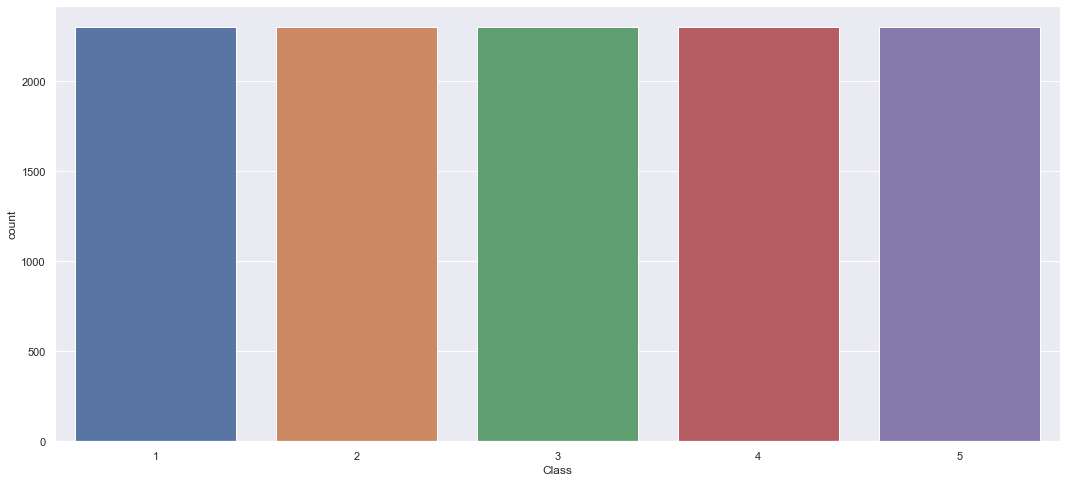

In [96]:
#Count plot of the number of datasets in each class
f, axes = plt.subplots(1, 1, figsize=(18, 8))
sb.countplot(Class)

In [97]:
print(Class.value_counts())

5    2300
4    2300
3    2300
2    2300
1    2300
Name: Class, dtype: int64


We can see that the data is evenly distributed with 2300 data sets within each class. Thus, for multi class classification, random train-test split will result in a fair distribution of the train sets.

# Binary Classification using Time Series Data

The aim of this Binary classification is to classify an EEG signal to either epileptic or not i.e whether an EEG signal belongs to class 1 or not

In [98]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Changing the values of the column "y" to either 1 or 0. Since we are performing Binary Classification to find whether a person is epilleptic or not, we need to find whether a row(EEG signal) belongs to class 1 or not.

Creating a new column "Result" which contains either 1 or 0(updated values of the column "y") and deleting the the column "y"


In [99]:
df = pd.read_csv('data.csv')
df["Result"]=df.y==1
df["Result"]=df["Result"].astype(int)
df.pop("y")
df.drop(df.columns[0], axis=1, inplace=True)

In [100]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,Result
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


# Splitting the datasets into Train and Test Datasets

In [101]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df['Result']) 
X = df.drop(df.columns[178], axis=1, inplace=False)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.25)

In [102]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


Data Preprocessing in order to be for data valid across different classification algorithms.

In [103]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Trying various classification algorithms

# 1.Gradient Boosting Classification

In [104]:

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gb_clf.fit(X_train, y_train)

print('Gradient Boosting Classifier')
print('Training:')

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier
Training:
Accuracy score (training): 0.949
Accuracy score (test): 0.914


# 2.Decision Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9094492753623188

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8928695652173914

For Train Dataset
True Negatives= 6711
False Positives= 205
False Negatives= 576
True Positives= 1133

True Negative Rate = 0.9703585887796414
False Positive Rate = 0.02964141122035859
False Negative Rate = 0.33703920421299005
True Positive Rate = 0.66296079578701

For Test Dataset
True Negatives= 2197
False Positives= 87
False Negatives= 221
True Positives= 370

True Negative Rate = 0.9619089316987741
False Positive Rate = 0.03809106830122592
False Negative Rate = 0.3739424703891709
True Positive Rate = 0.626057529610829



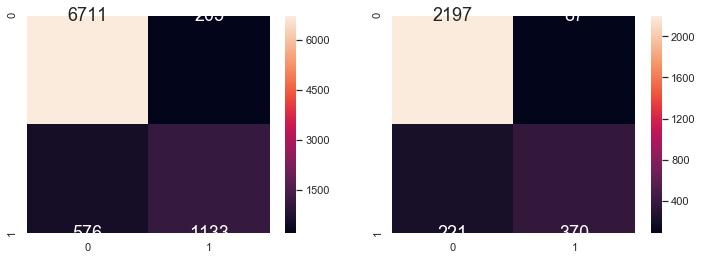

In [105]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("For Train Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))

tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("For Test Dataset")
print("True Negatives= {0}\nFalse Positives= {1}\nFalse Negatives= {2}\nTrue Positives= {3}".format(tn, fp, fn, tp))


tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
fpr=fp/(fp+tn)
fnr=fn/(fn+tp)
print()

print("True Negative Rate = {0}\nFalse Positive Rate = {1}\nFalse Negative Rate = {2}\nTrue Positive Rate = {3}".format(tnr, fpr, fnr, tpr))
print()


# 3.Random Forest Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9828405797101449

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.959304347826087



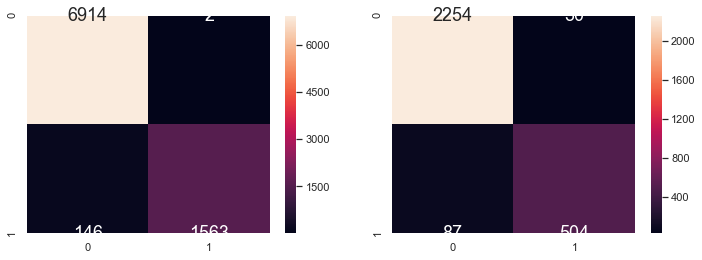

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 4.Extreme Random Forest Classification

In [107]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9973333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9690434782608696



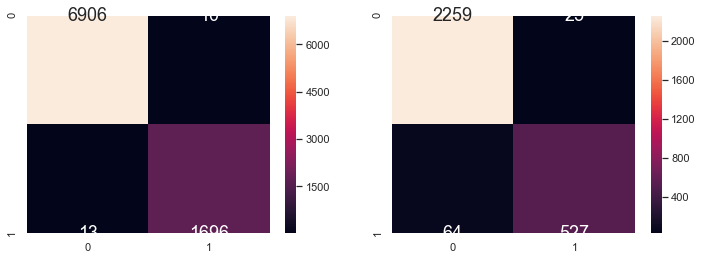

In [108]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


Need to install xgboost library on Anaconda Prompt
Type this "pip install xgboost" on Anaconda Prompt

# 5.Extreme Gradient Boosting Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9686956521739131



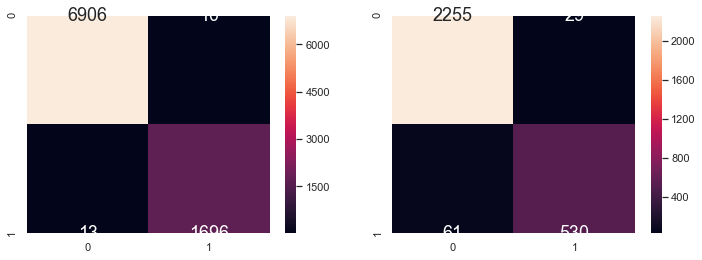

In [109]:
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgbc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgbc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


Conclusion: We can use Time Series Data to classify an EEG signal as epileptic or not as we were getting very high accuracies of most of the above tried classification algorithms. This is due to the huge variations in the datapoints as seen in the exploratory analysis before.

Despite very high classification accuracies of all the algorithms, Random Forest, Extreme Random Forest and Extreme Gradient Boosting classification have the highest classification accuracy of around 97%

# Multivariate Classification Method-1: Classification into 5 classes using Time Series Data

The aim of this Multivariate classification method-1 is to classify an EEG signal into 5 different classes based on Time-Series Data

Importing Essential Libraries

In [110]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [111]:
df = pd.read_csv('data.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [112]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Splitting the datasets into Train and Test Datasets

In [113]:
from sklearn.model_selection import train_test_split

Result = pd.DataFrame(df['y']) 
X = df.drop(df.columns[178], axis=1, inplace=False)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Result, test_size = 0.25)

In [114]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


Data Preprocessing inorder to be valid accorss different classification algorithms

In [115]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X)

# transform our data matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Trying various classification algorithms

# 1.Gradient Boosting Classification

In [116]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=50)
gb_clf.fit(X_train, y_train)

print('Gradient Boosting Classifier')
print('Training:')

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Classifier
Training:
Accuracy score (training): 0.999
Accuracy score (test): 0.623
Wall time: 1min 17s


# 2.Decision Tree

In [117]:
%%time

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 30)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.774840579710145

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4598260869565217

Wall time: 4.11 s


# 3.Random Forest Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5742608695652174

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.48695652173913045

Wall time: 1.5 s


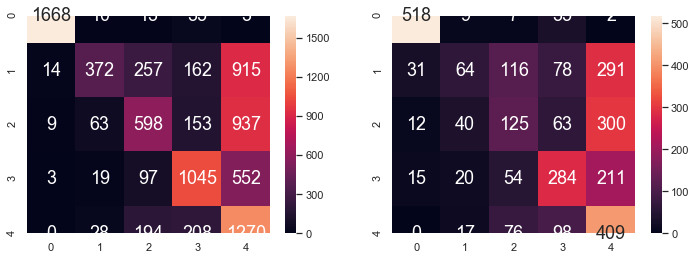

In [118]:
%%time

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# 4.Extreme Random Forest Classification

In [119]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9979130434782608

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7005217391304348

Wall time: 54.6 s


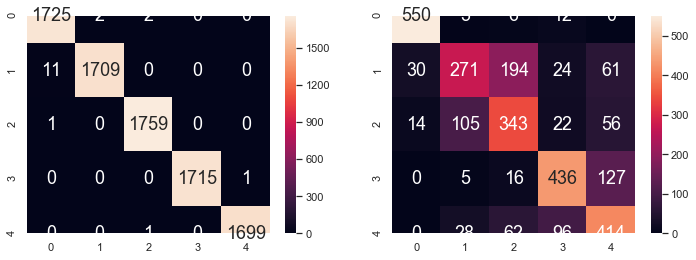

In [120]:
%%time

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Need to install xgboost library on Anaconda Prompt
Type this "pip install xgboost" on Anaconda Prompt

# 5.Extreme Gradient Boosting Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9998840579710145

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6921739130434783

Wall time: 39.5 s


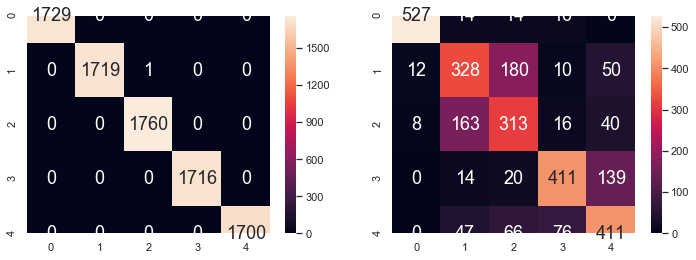

In [121]:
%%time

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgbc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgbc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Conclusion: Except Extreme Gradient boosting and Extreme Random forest algorithms, the rest of the classification algorithms have a classifcation accuracy in the range of 45% to 60% with most of them around 50%. From this we can conclude that we need to change or add some more parameters inorder to improve the classification accuracy.

Extreme Random Forest classification algorithm has higher classification accuracy because of additional parameter "entropy"

Besides the low accuracy, another problem that we are facing here is the long runtime due to the large amount of datapoints. This will be dealt with later on with feature selection and and tuning of parameters. However, we will first be dealing with the issues of low accuracy through the use of feature extraction of the time series data.

# Multivariate Classification Method-2: Classification into 5 different classes based on Frequency Domain data

Due to differences in the phases of the EEG data, as well as differences in profile of the signals in time domain, classification the data into 5 different classes proves to be difficult when analysed in the time domain. Besides that, there are too many datapoints to consider during the classification which results in undesirable runtime. As such, we shall proceed to analyse the data in the frequency domain, which will solve the problems mentioned above.

The aim of this method is to classify the EEG signals into 5 different classes using the respone variable "y" by applying the above mentioned classification algorithms on Frequency domain data rather than Time series data. The time series data is converted into a frequency domain data using the Fast Fourier Transformation.

The predictors used from the frequency domain data are called as "frequency bins". The human brain waves have natural frequency spectrum from 1Hz to 55Hz. Hence, we divide the 50 frequencies into 10 frequency bins with each bin containing 5 consequitive frequencies.

In [122]:
# Basic Libraries
import numpy as np
import statistics
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy.fftpack import fft
import math
import numpy as np
import matplotlib.pyplot as plt

In [123]:
"""Function to prepare a list of values of each row for FFT"""
def list_of_values(list_of_row_numbers,data):

    df=[]
    
    for i in list_of_row_numbers:
        df.append(data.iloc[i])
   
    df_indexed_numbers=[df[j] for j in range(len(df))]

    df_numbers=[[] for i in range(len(df_indexed_numbers))]
    
    for k in range(len(df_indexed_numbers)):

        for l in range(len(df_indexed_numbers[k])):
            df_numbers[k].append(df_indexed_numbers[k][l])
    
    return df_numbers

In [124]:
"""Executing Fast Fourier transform(FFT) from the initailly prepared list of values of a row"""
def fft_2(list_values, cutoff_freq):
    
    fft_list=[]
    
    for i in list_values:
        
        list_not_mapped = np.absolute(fft(i[1:179]))[0:cutoff_freq]
        
        fft_list.append(list_not_mapped)
    
    return fft_list

In [125]:
"""Function to plot the Fast Fourier transform plot for any row"""
def fft_2_plot(list_values, cutoff_freq):
    
    fft_list = fft_2(list_values, cutoff_freq)
    
    f, axes = plt.subplots(len(list_values), 1, figsize=(10, 12))
    
    for i,j in enumerate(list_values):
        
        sb.lineplot(range(cutoff_freq),fft_list[i],ax=axes[i])

In [126]:
"""Combining the dataframe given with additional paramenters(frequency bins) as columns.
   Total columns= 180 +number of frequency bins"""
def fft_merge_freq_with_data(row_numbers, cutoff_freq, no_of_freq_bins, data):
    
    df_rows = list_of_values(row_numbers, data)
    
    fft_rows = fft_2(df_rows, cutoff_freq)
    
    freq_bin_size = cutoff_freq // no_of_freq_bins
    
    fft_rows_with_bin = [[] for i in range(len(row_numbers))]
    
    for i in range(0, cutoff_freq, freq_bin_size):
        
        for j in range(len(row_numbers)):
            
            if ((cutoff_freq-i) // freq_bin_size) == 0:
                
                fft_rows_with_bin[j].append(statistics.mean(fft_rows[j][i:]))
                
            else:
            
                fft_rows_with_bin[j].append(statistics.mean(fft_rows[j][i:i+freq_bin_size+1]))
   
    df_fft_rows = [df_rows[i] + fft_rows_with_bin[i] for i in range(len(row_numbers))]
    
    return df_fft_rows, len(fft_rows_with_bin[0])

In [127]:
"""Adding the names of the headers for the new columns"""
def create_dataframe(row_numbers, cutoff_freq, no_of_freq_bins, data):
    
    merged_dataframe, actual_no_of_bins = fft_merge_freq_with_data(row_numbers, cutoff_freq, no_of_freq_bins, data)
    
    column_header_list_without_bins = list(data.columns)
    
    freq_bin_header_names_list = [column_header_list_without_bins[i] + '_f' for i in range(1,actual_no_of_bins+1)]
    
    column_header_list =  column_header_list_without_bins + freq_bin_header_names_list
    
    df = pd.DataFrame(merged_dataframe, columns = column_header_list) 
    
    return df

In [128]:
szdata = pd.read_csv('Data.csv')
szdata.rename( columns={'Unnamed: 0':'ID'}, inplace=True )
szdata.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [129]:
freq_df = create_dataframe([i for i in range(11500)], 50, 10, szdata)
freq_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X1_f,X2_f,X3_f,X4_f,X5_f,X6_f,X7_f,X8_f,X9_f,X10_f
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,2833.757898,995.764823,2830.329922,1176.270503,819.677700,294.744531,326.558837,156.237189,169.938934,206.523742
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,16683.591393,10819.851846,7768.926719,6658.398465,3484.727469,2487.819250,1032.034985,763.559741,463.670391,216.221523
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,2559.261620,1205.229525,957.984626,669.534680,388.680461,354.472001,175.487311,103.425916,40.777735,36.618002
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,2450.327604,265.630224,383.569217,303.307789,204.098983,127.287011,103.764433,61.167786,39.079265,28.570842
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,1233.055626,731.720032,769.349485,768.901426,762.019277,404.933659,221.572148,124.110755,98.746315,77.461764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,1501.441417,805.864282,238.571723,151.218088,118.963915,90.504347,57.561434,40.958602,27.554074,18.430358
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,3873.925363,5916.425146,3202.166120,1616.560723,739.232891,477.354768,315.337855,187.928891,199.850382,183.581252
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,1434.317800,400.981211,668.064817,511.491108,450.982194,472.547238,436.546330,256.203322,191.699748,83.537768
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,3282.629276,1486.618975,640.388692,430.136837,439.195553,240.559419,145.650678,121.872061,93.332768,72.673898


In [130]:
# Extract Response and Predictors
y = pd.DataFrame(freq_df['y'])
X = pd.DataFrame(freq_df[list(freq_df.columns)[180:]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# 1) Decision Tree Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6855652173913044

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.662608695652174

Wall time: 659 ms


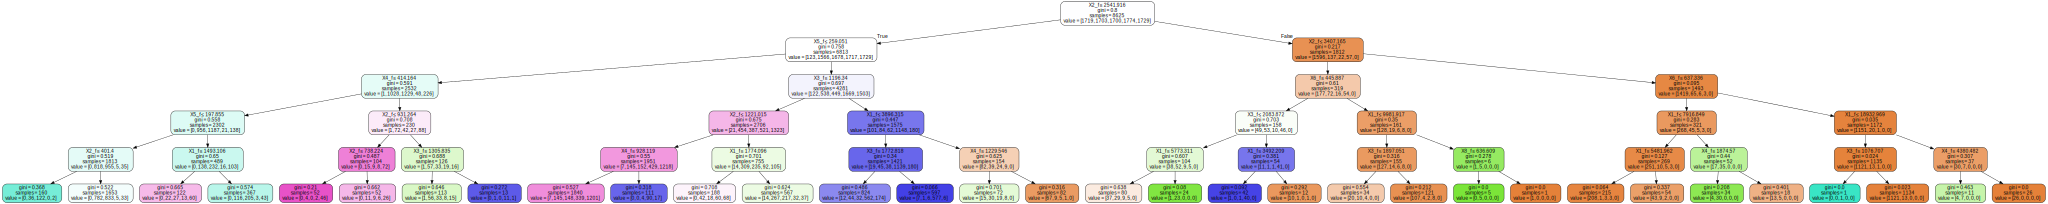

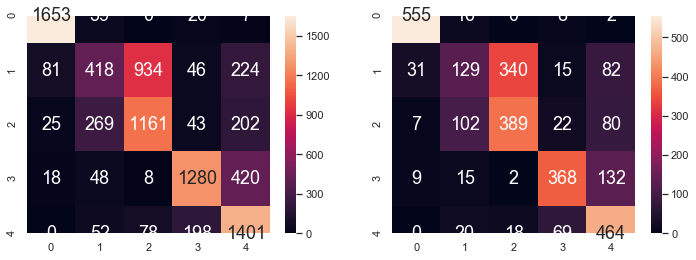

In [131]:
%%time

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

# 2) Gradient Boosting Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.984463768115942

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7238260869565217

Wall time: 10.6 s


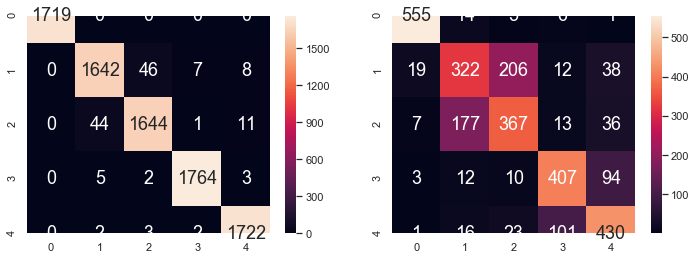

In [132]:
%%time

thresh = 0.5

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)

gbc.fit(X_train, y_train)

y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gbc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gbc.score(X_test, y_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 3) Random Forest Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8418550724637681

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7217391304347827

Wall time: 977 ms


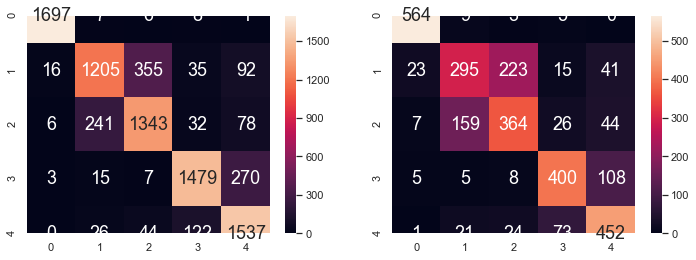

In [133]:
%%time

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, random_state = 69)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 4) Extreme Random Forest Classification

Wall time: 0 ns


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.910608695652174

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7478260869565218



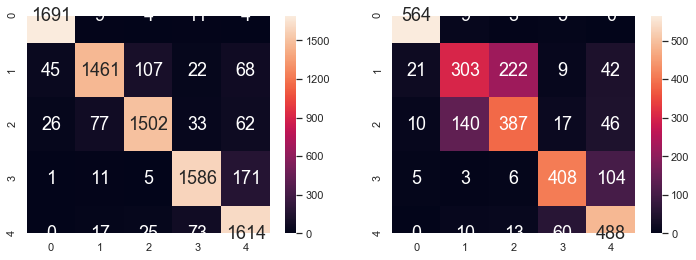

In [134]:
%time

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 5) Extreme Gradient Boosting Classification

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9942028985507246

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7485217391304347

Wall time: 7.69 s


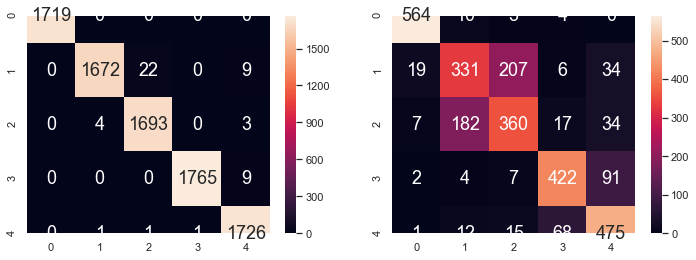

In [135]:
%%time

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgbc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgbc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


Conclusion: The change of predictor varibles to frequency bins(a set of frequencies) to predict the response variable "y" has proved to be effective accross most of the classification algorithms as the classification accuracy improved to the range of 65% to around 75%. Runtime is also massively improved due to smaller number of data points as compared to before.

Among all the classification algorithms, Extreme Gradient boosting and Extreme Random Forest classification algorithms have the highest classification accuracy of around 75%.

While this is a good sign, there is still room for improvements. As such, we seek to improve upon the predictions using additional features extracted from the time series.

# Multivariate Classification Method-3: Classification into 5 different classes based on features extracted from time series

The aim of this method is to analyse the data using features extracted from the time series. This of course includes FFT done above. The module we will be using is called tsfresh. To save time, please use the Features.csv provided as the feature extraction process can take some time.

From the features extracted, we shall compare the performance of the models with and without features selection (selection of best predictors among all features). The predictors will be selected based on algorithm in feature_selection in sklearn as well as meaning of the features according to tsfresh main page. Common predictors such as entropy, skewness etc of the fft data will also be used.

Importing Essential Libraries

In [136]:
# Basic Libraries
import numpy as np
import statistics
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy.fftpack import fft
import math
import numpy as np
import matplotlib.pyplot as plt

Definition of basic functions for selection of best predictors

In [137]:
def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

In [138]:
""" Modifies classifcation and drops data from unwanted class."""
def preprocessing(data, ID, Class, mode = 'multi'):
    
    # Identify members of the various class
    class_1_ID = [ID[i] for i in range(len(Class)) if (Class[i] == 1)]
    class_2_ID = [ID[i] for i in range(len(Class)) if (Class[i] == 2)]
    class_3_ID = [ID[i] for i in range(len(Class)) if (Class[i] == 3)]
    class_4_ID = [ID[i] for i in range(len(Class)) if (Class[i] == 4)]
    class_5_ID = [ID[i] for i in range(len(Class)) if (Class[i] == 5)]
    
    Results = pd.DataFrame(Class)
    
    if mode == 'multi':
        pass
    
    elif mode == 'binary':
        new_class = [(i == '1' or i == 1) for i in Class]
        Results['Class'] = new_class
        
    elif mode == '2/3':
        Results = Results.drop(class_1_ID, axis=0)
        Results = Results.drop(class_4_ID, axis=0)
        Results = Results.drop(class_5_ID, axis=0)
        data = data.drop(class_1_ID, axis=0)
        data = data.drop(class_4_ID, axis=0)
        data = data.drop(class_5_ID, axis=0)
        
    elif mode == '4/5':
        Results = Results.drop(class_1_ID, axis=0)
        Results = Results.drop(class_2_ID, axis=0)
        Results = Results.drop(class_3_ID, axis=0)
        data = data.drop(class_1_ID, axis=0)
        data = data.drop(class_2_ID, axis=0)
        data = data.drop(class_3_ID, axis=0)
        
    elif mode == 'exclude 1':
        new_class = [(i == '2' or i == 2 or i == '3' or i == 3) for i in Class]
        Results['Class'] = new_class
        Results = Results.drop(class_1_ID, axis=0)
        data = data.drop(class_1_ID, axis=0)
    
    return Results, data

In [139]:
""" Function selects the best predictor from the given data. """
def get_best_predictors(data, classification, n_features, plot = True):

    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif

    selector = SelectKBest(f_classif, k=n_features)
    selected_features = selector.fit_transform(data, classification)
    f_score_indexes = (-selector.scores_).argsort()[:n_features]

    new_predictors = []
    for i  in f_score_indexes:
        new_predictors += [features.columns[i]]
        
    if plot == True:
        # Relationship between Response and the Predictors
        trainDF = pd.concat([data, classification], axis = 1)

        f, axes = plt.subplots(n_features, 1, figsize=(18, 42))
        count = 0
        for var in new_predictors:
            sb.boxplot(x = var, y = "Class", data = trainDF, orient = "h", ax = axes[count])
            count += 1
    
    return new_predictors

In [140]:
# Basic setting up of dataframe for features extraction
d = pd.read_csv("data.csv", header = None )
d = d.drop(d.head(1).index)
columns = list(d.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'target' )
d.columns = columns
d = d.reset_index(drop = True)
y = d.target
ID = d.ID
d = d.drop(['ID','target'], axis = 1)
d = d.stack()
d.index.rename(['Index', 'Time'], inplace = True)
d = d.reset_index()
d = d.astype({0:'int64'})

d.info()
d

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047000 entries, 0 to 2046999
Data columns (total 3 columns):
Index    int64
Time     int64
0        int64
dtypes: int64(3)
memory usage: 46.9 MB


,Index,Time,0
0,0,1,135
1,0,2,190
2,0,3,229
3,0,4,223
4,0,5,192
...,...,...,...
2046995,11499,174,5
2046996,11499,175,4
2046997,11499,176,-2
2046998,11499,177,2


### Do note that the feature extraction process will take a long time. Please use the Features.csv attached during the submission of the project.

In [141]:
features = pd.read_csv('Features.csv')
features = features.astype("float64")

features = drop_constant_column(features)

# Basic preparation of data
df = pd.read_csv("data.csv")

columns = list(df.columns)
columns.pop()
columns[0] = 'ID'
columns.append( 'Class' )
df.columns = columns

ID = df.ID
df = df.set_index("ID")

Class = df.Class
df = df.drop(['Class'], axis = 1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [142]:
features = pd.read_csv('Features.csv')
features = features.astype("float64")

features = drop_constant_column(features)

data = pd.concat([ID,features],axis = 1)
data = data.set_index('ID')
data

,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,0__symmetry_looking__r_0.05,0__symmetry_looking__r_0.1,0__symmetry_looking__r_0.15000000000000002,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,1681484.0,5700.0,0.016429,0.010184,0.129972,130.479532,-0.535129,-6.513932,2.570768,223.4,...,1.0,1.0,1.0,-30065.028409,-9.138002e+04,-5.320209e+04,0.0,0.0,0.0,9160.587426
X15.V1.924,39768644.0,14039.0,-0.098968,-0.281321,0.122362,351.128655,-0.241603,-10.923633,10.968410,536.8,...,0.0,1.0,1.0,-733062.335227,-3.244193e+06,-8.015616e+06,0.0,0.0,0.0,222629.043555
X8.V1.1,692846.0,2458.0,0.067272,-0.001779,0.049609,-25.064327,0.299561,2.569659,2.046035,25.3,...,1.0,1.0,1.0,244.988636,1.943420e+03,5.050994e+03,0.0,0.0,1.0,1952.436182
X16.V1.60,890386.0,1072.0,0.052697,0.023111,0.039498,-62.847953,0.399684,1.145511,0.656791,-48.7,...,1.0,1.0,1.0,5970.090909,8.921672e+03,1.065919e+04,0.0,0.0,0.0,253.564954
X20.V1.54,274368.0,2738.0,0.198667,0.178491,0.024742,19.356725,0.323638,1.539732,1.125383,63.3,...,1.0,1.0,1.0,-3367.215909,-8.528046e+02,-1.028721e+02,5.0,4.0,1.0,1497.148340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,265412.0,980.0,0.430144,0.375553,0.040561,-11.461988,0.641050,4.413829,1.321118,29.7,...,1.0,1.0,1.0,-693.943182,-4.606207e+02,5.070116e+02,2.0,5.0,0.0,1464.480874
X19.V1.354,4739572.0,5685.0,-0.018805,-0.043347,0.119705,77.251462,0.216411,6.159959,6.947409,189.6,...,1.0,1.0,1.0,60923.528409,3.100307e+05,9.007813e+05,0.0,1.0,1.0,26594.612928
X8.V1.28,355312.0,3092.0,0.206047,0.161952,0.064273,94.111111,-0.629980,-4.941176,1.522814,129.6,...,1.0,1.0,1.0,666.522727,5.214046e+03,9.656983e+03,4.0,1.0,0.0,1950.534402


In [143]:
# Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Class, test_size = 0.20)

# 1) Decision Tree Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7493478260869565

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7373913043478261

Wall time: 7.96 s


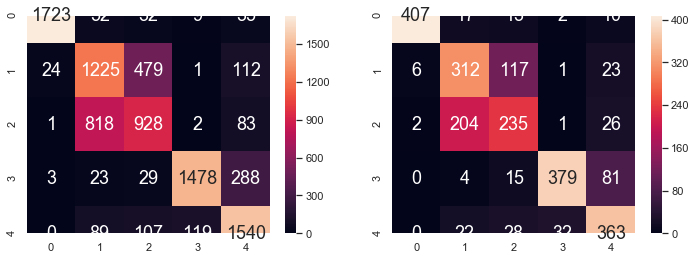

In [144]:
%%time

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# 2) Gradient Boosting Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8126086956521739

Wall time: 7min 22s


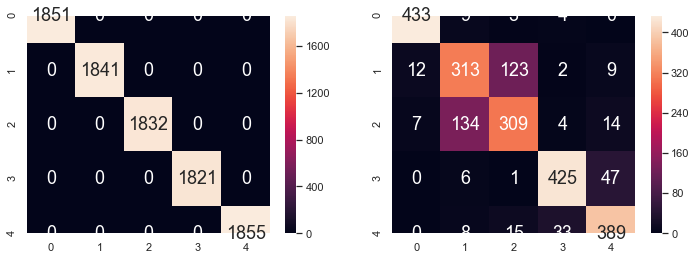

In [145]:
%%time

thresh = 0.5

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=100)

gbc.fit(X_train, y_train)

y_train_pred = gbc.predict(X_train)
y_test_pred = gbc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gbc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gbc.score(X_test, y_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# 3) Random Forest Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9064130434782609

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7973913043478261

Wall time: 1.39 s


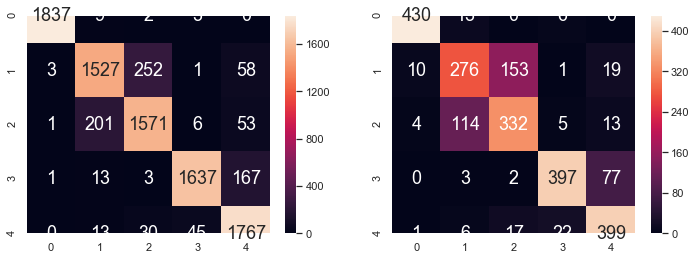

In [146]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 100)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 4) Extreme Random Forest Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9942391304347826

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8495652173913043

Wall time: 1min 5s


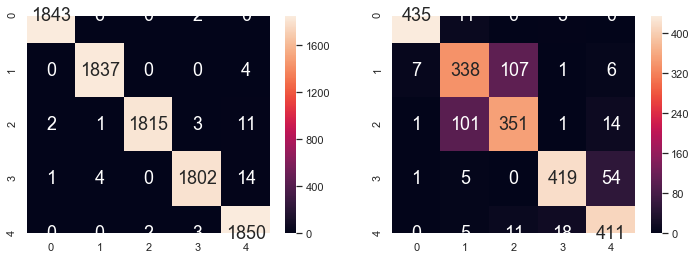

In [147]:
%%time

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train, y_train)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 5) Extreme Gradient Boosting

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8530434782608696

Wall time: 2min 4s


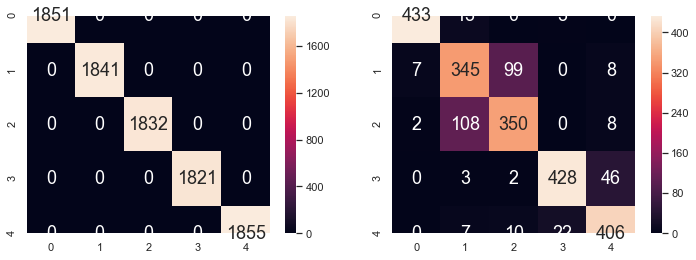

In [148]:
%%time

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(depth = 3)

xgbc.fit(X_train, y_train)

y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgbc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgbc.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Selection of best predictors

Using features selection from sklearn, we are able to identify the predictors that can best differentiate the different classes.
The boxplots of these features are plotted out below. Besides only identifying the predictors for the multiclass classification, We have also identified the predictors that are best used to differentiate class 2/3 with 4/5, 2 with 3 and 4 with 5 respectively. This allows us to eliminate the tendency of the algorithm to select predictors best suited to differentitate class 1 from the rest due to the huge difference between class 1 and the other classes.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [66] are constant.
  UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


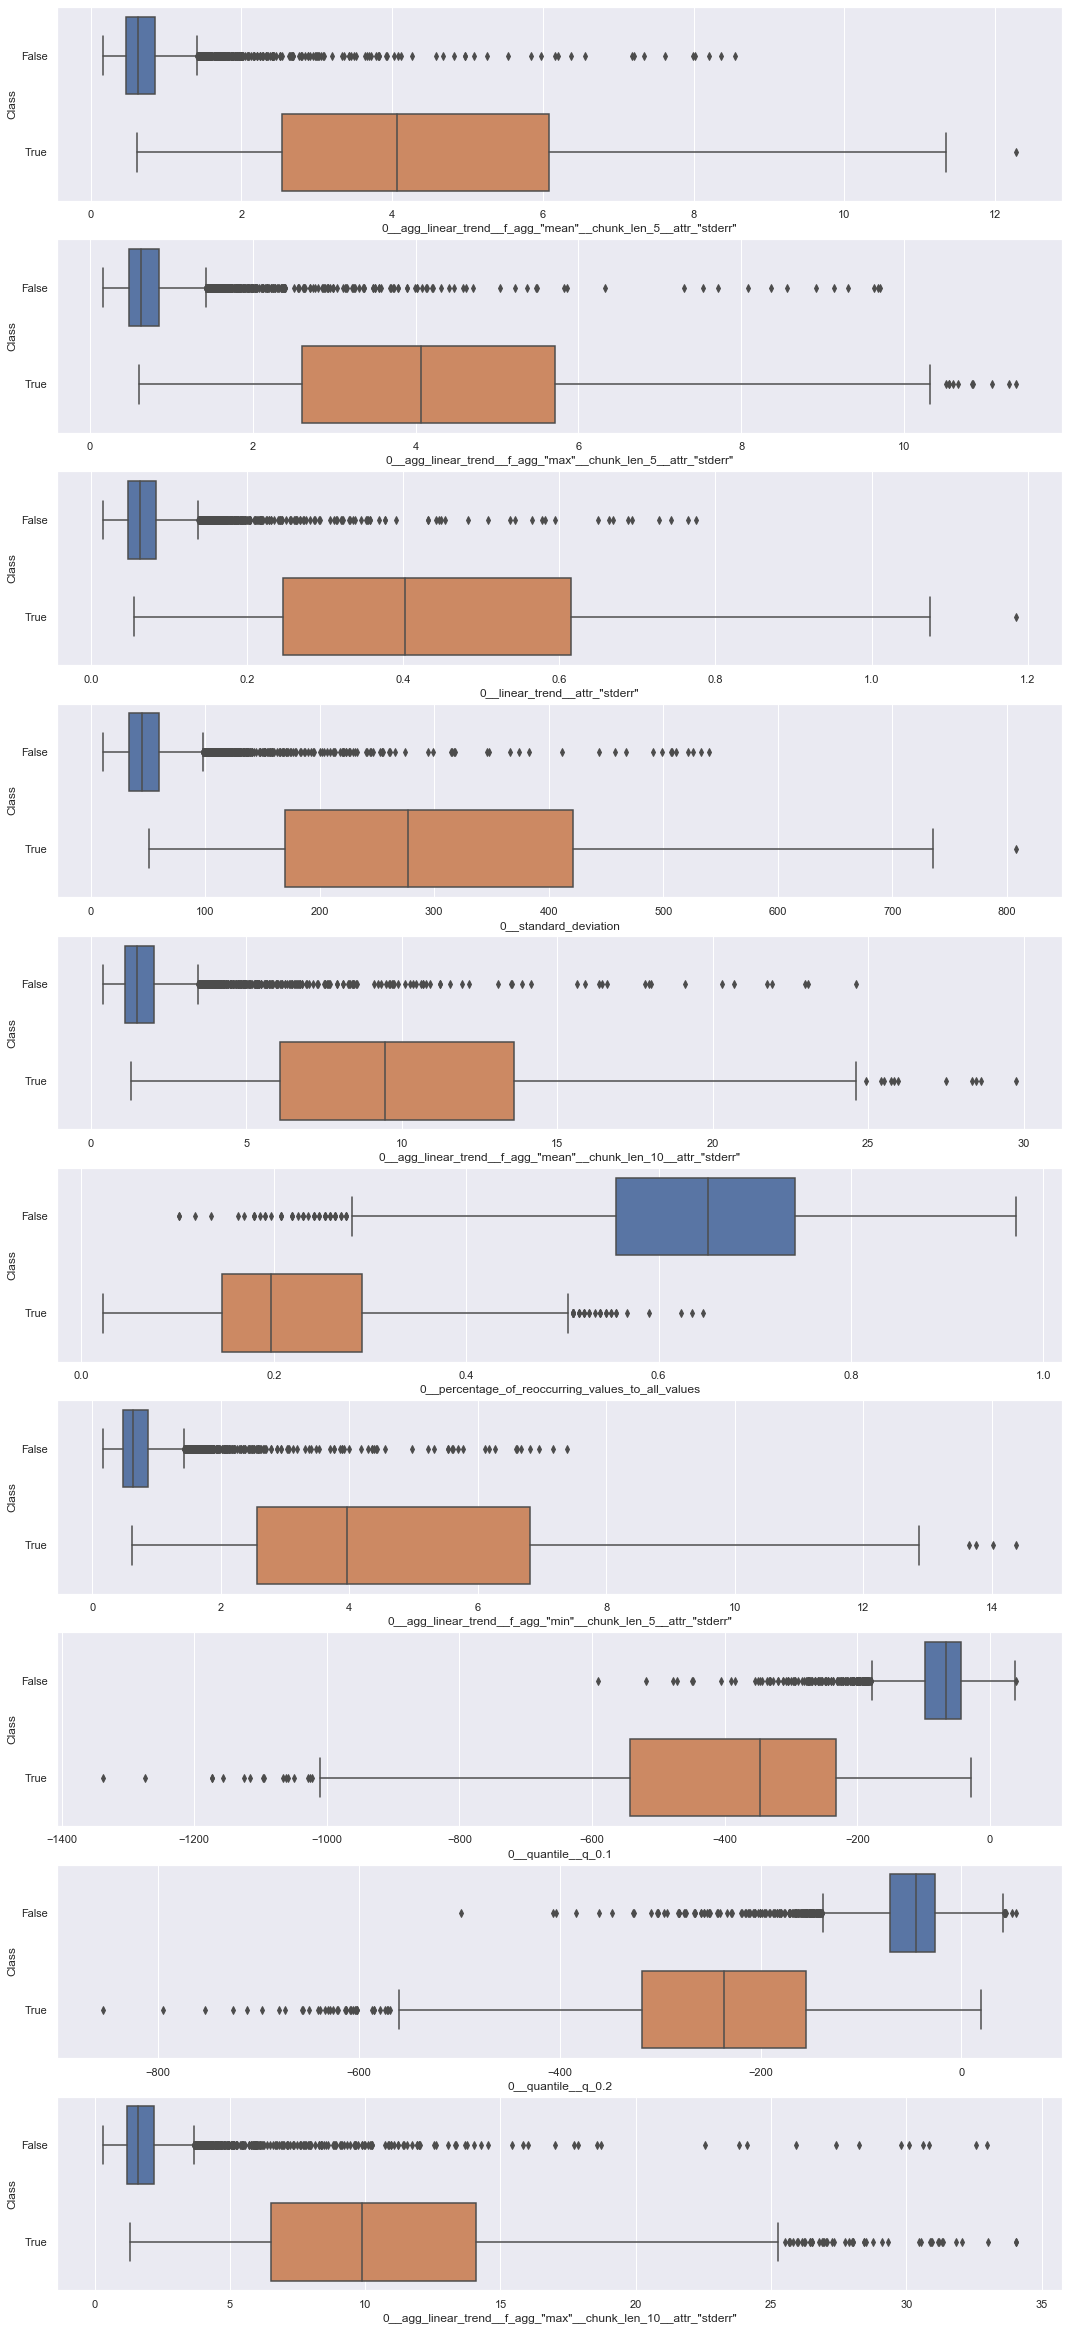

In [149]:
train_index = pd.Series(X_train.index)

y_train_processed, X_train_processed = preprocessing(X_train, train_index, y_train, mode = 'binary')
predictors = get_best_predictors(X_train_processed, y_train_processed, 10, plot = True)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 66 648] are constant.
  UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


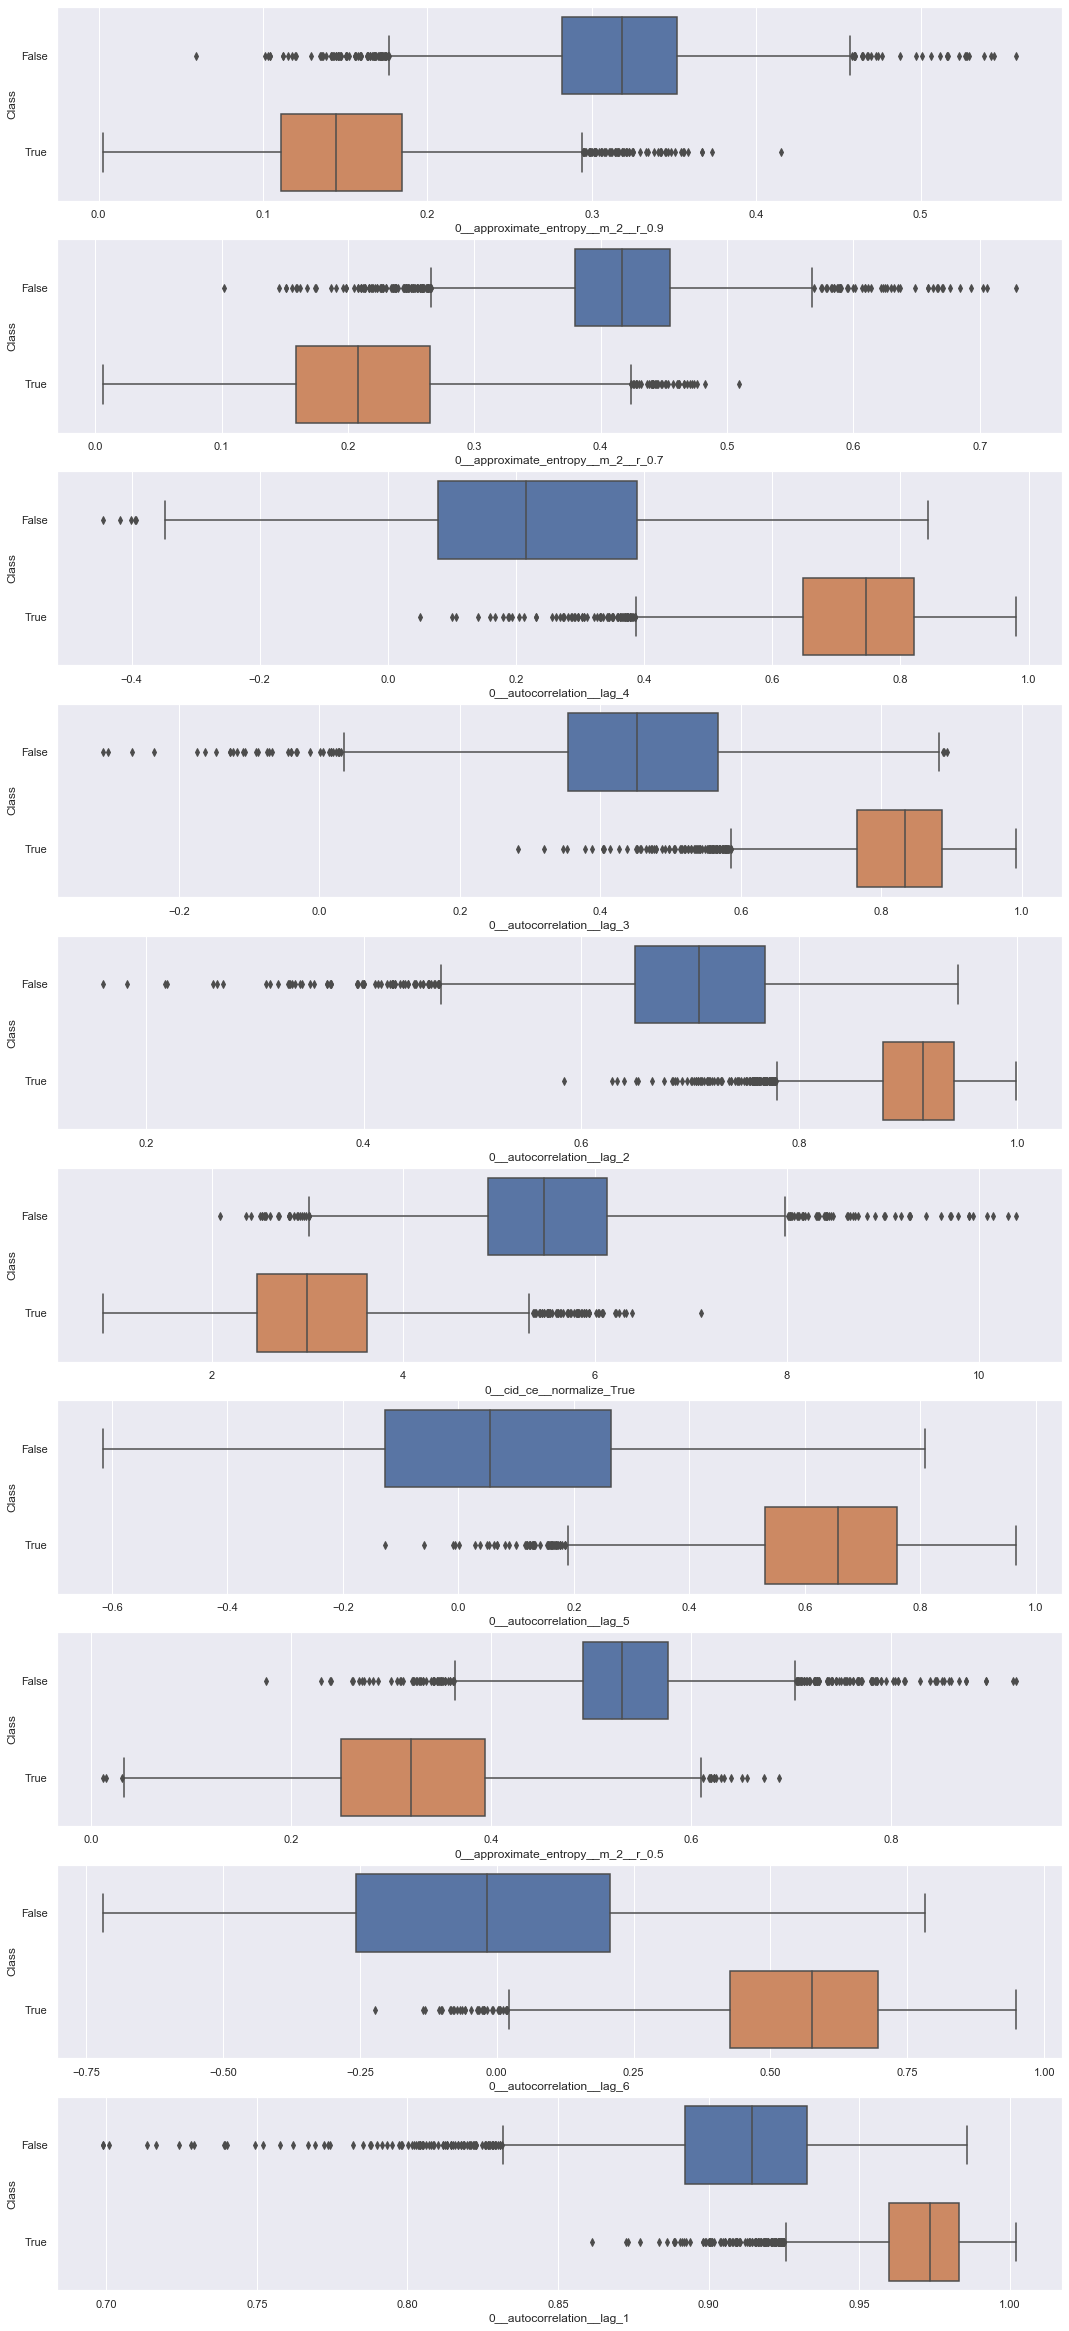

In [150]:
# For mode 'exclude 1', True refers to class 2/3 while False refers to class 4/5

y_train_processed_2, X_train_processed_2 = preprocessing(X_train, train_index, y_train, mode = 'exclude 1')
predictors_2 = get_best_predictors(X_train_processed_2, y_train_processed_2, 10, plot = True)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 66 648] are constant.
  UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


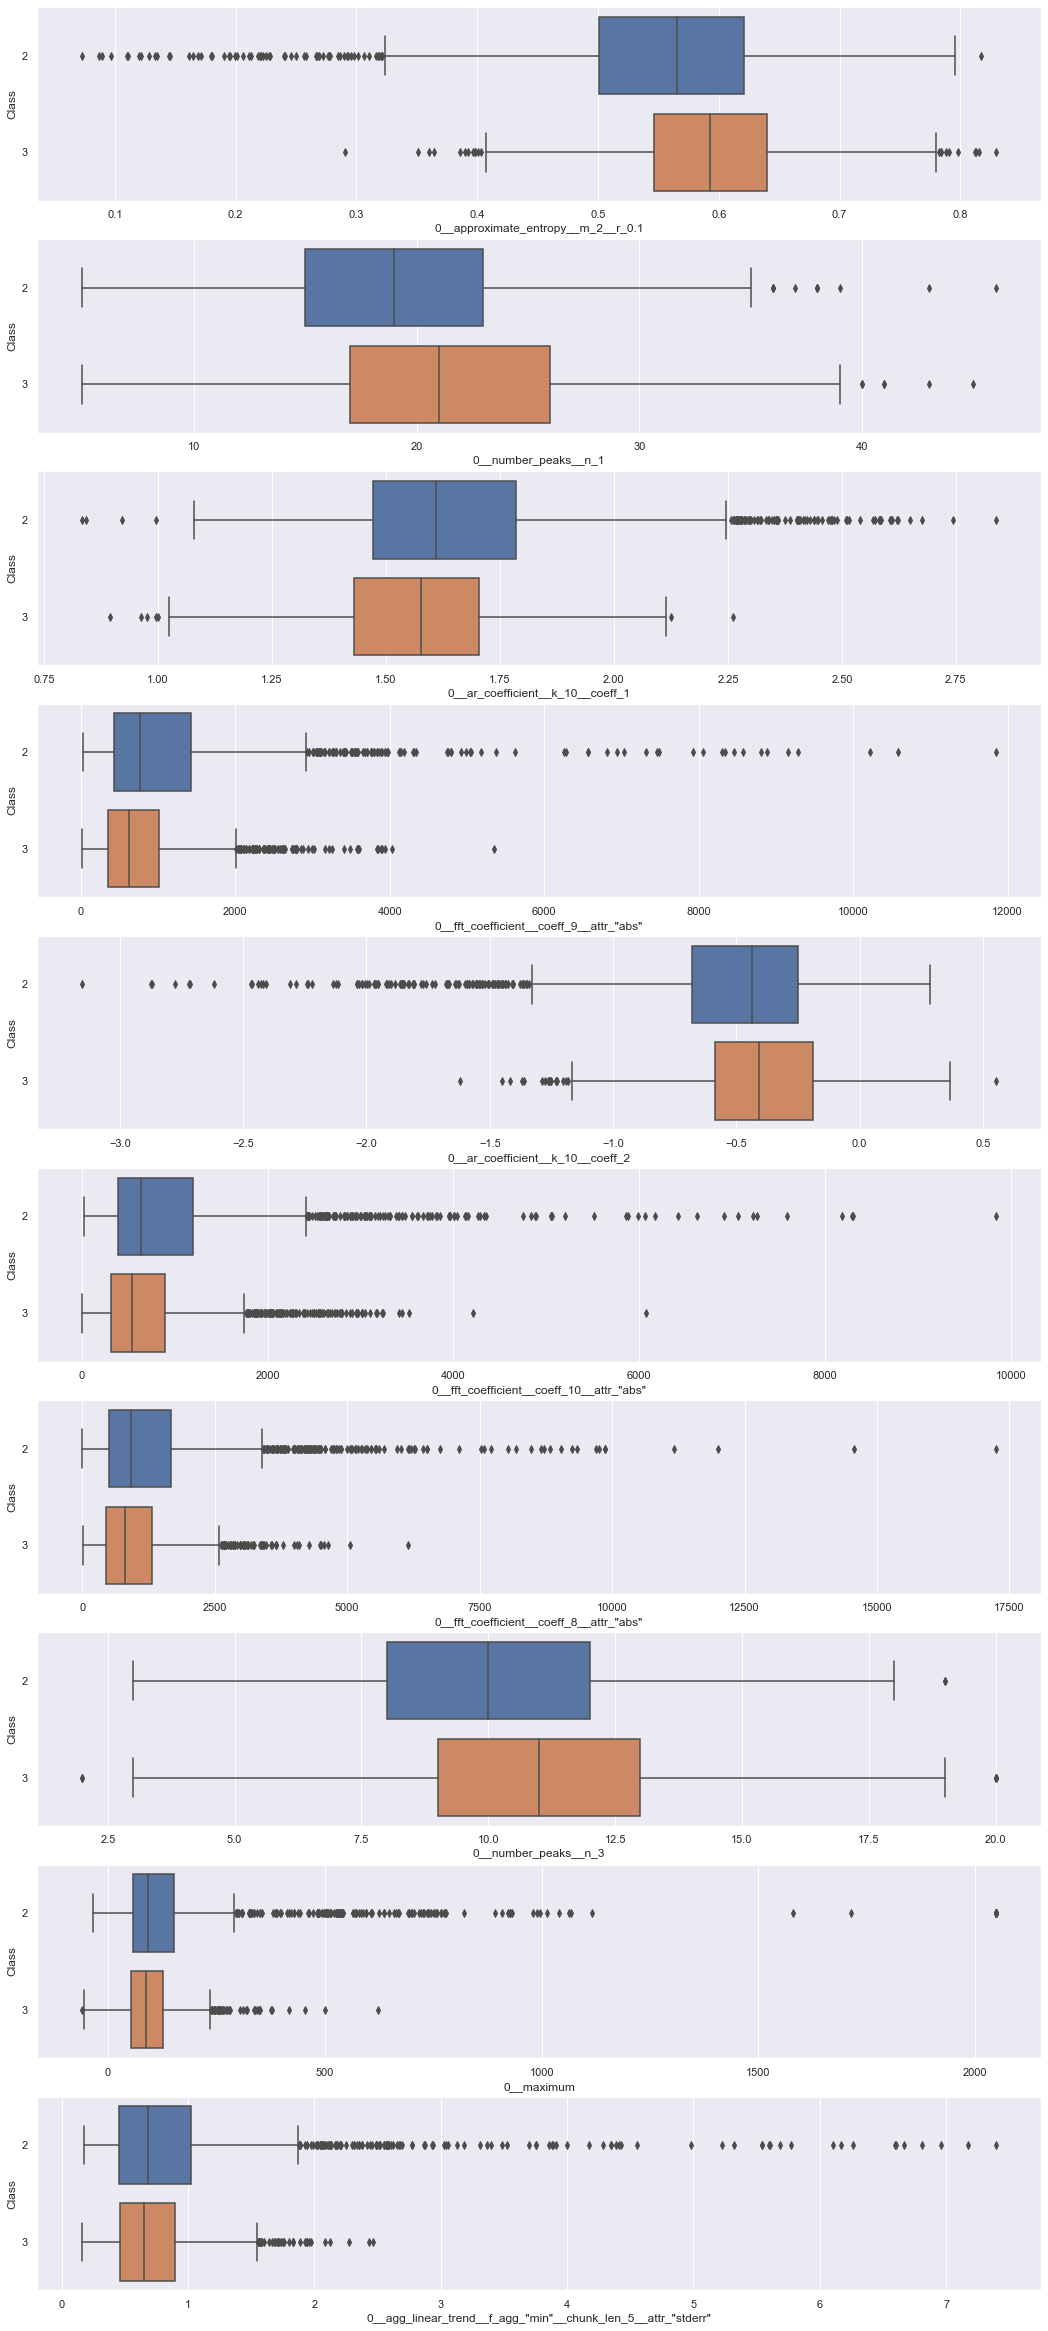

In [151]:
y_train_processed_3, X_train_processed_3 = preprocessing(X_train, train_index, y_train, mode = '2/3')
predictors_3 = get_best_predictors(X_train_processed_3, y_train_processed_3, 10, plot = True)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 66 592 646 647 648 660 661] are constant.
  UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


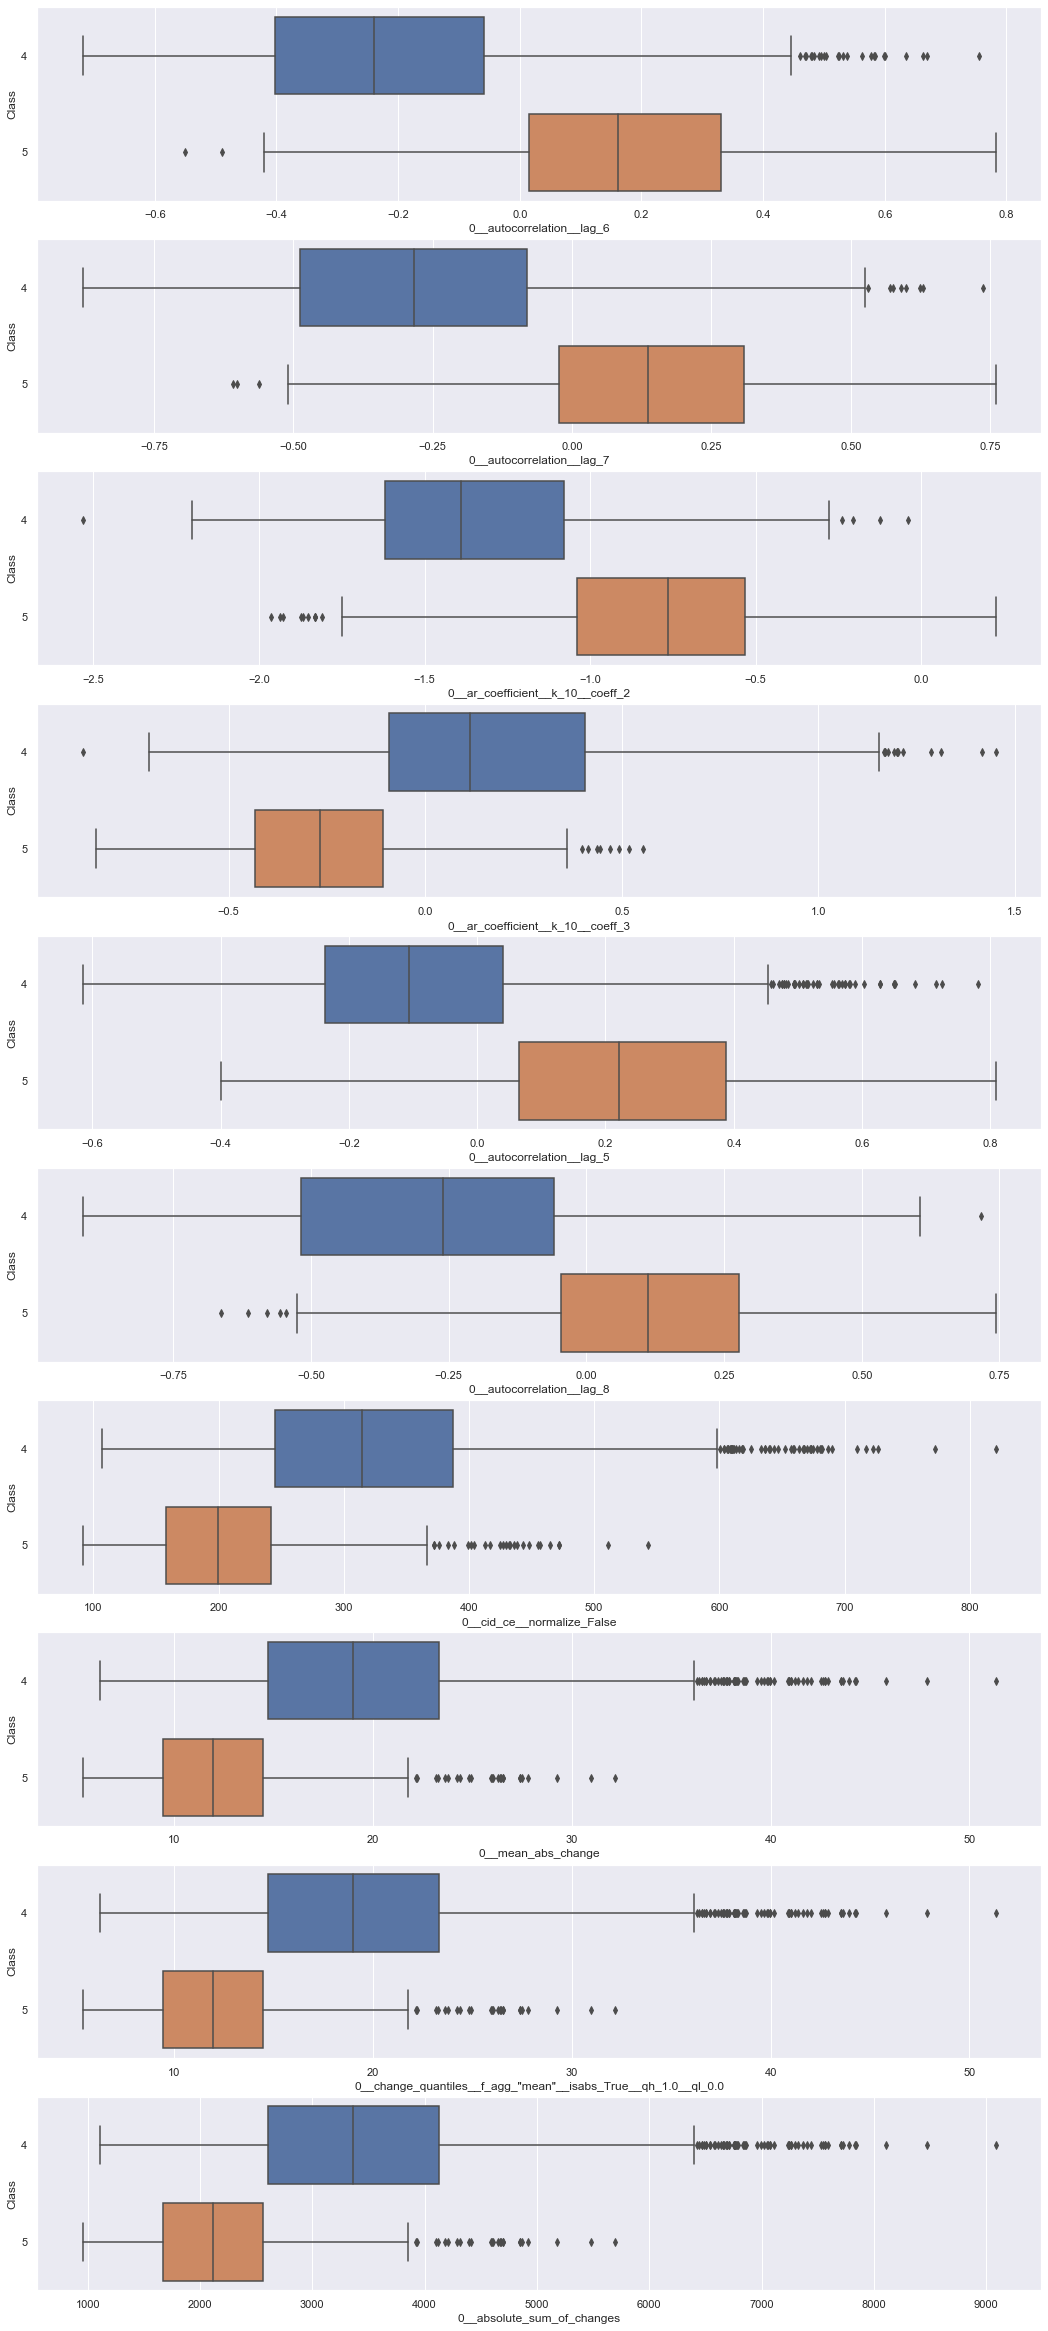

In [152]:
y_train_processed_4, X_train_processed_4 = preprocessing(X_train, train_index, y_train, mode = '4/5')
predictors_4 = get_best_predictors(X_train_processed_4, y_train_processed_4, 10, plot = True)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [66] are constant.
  UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


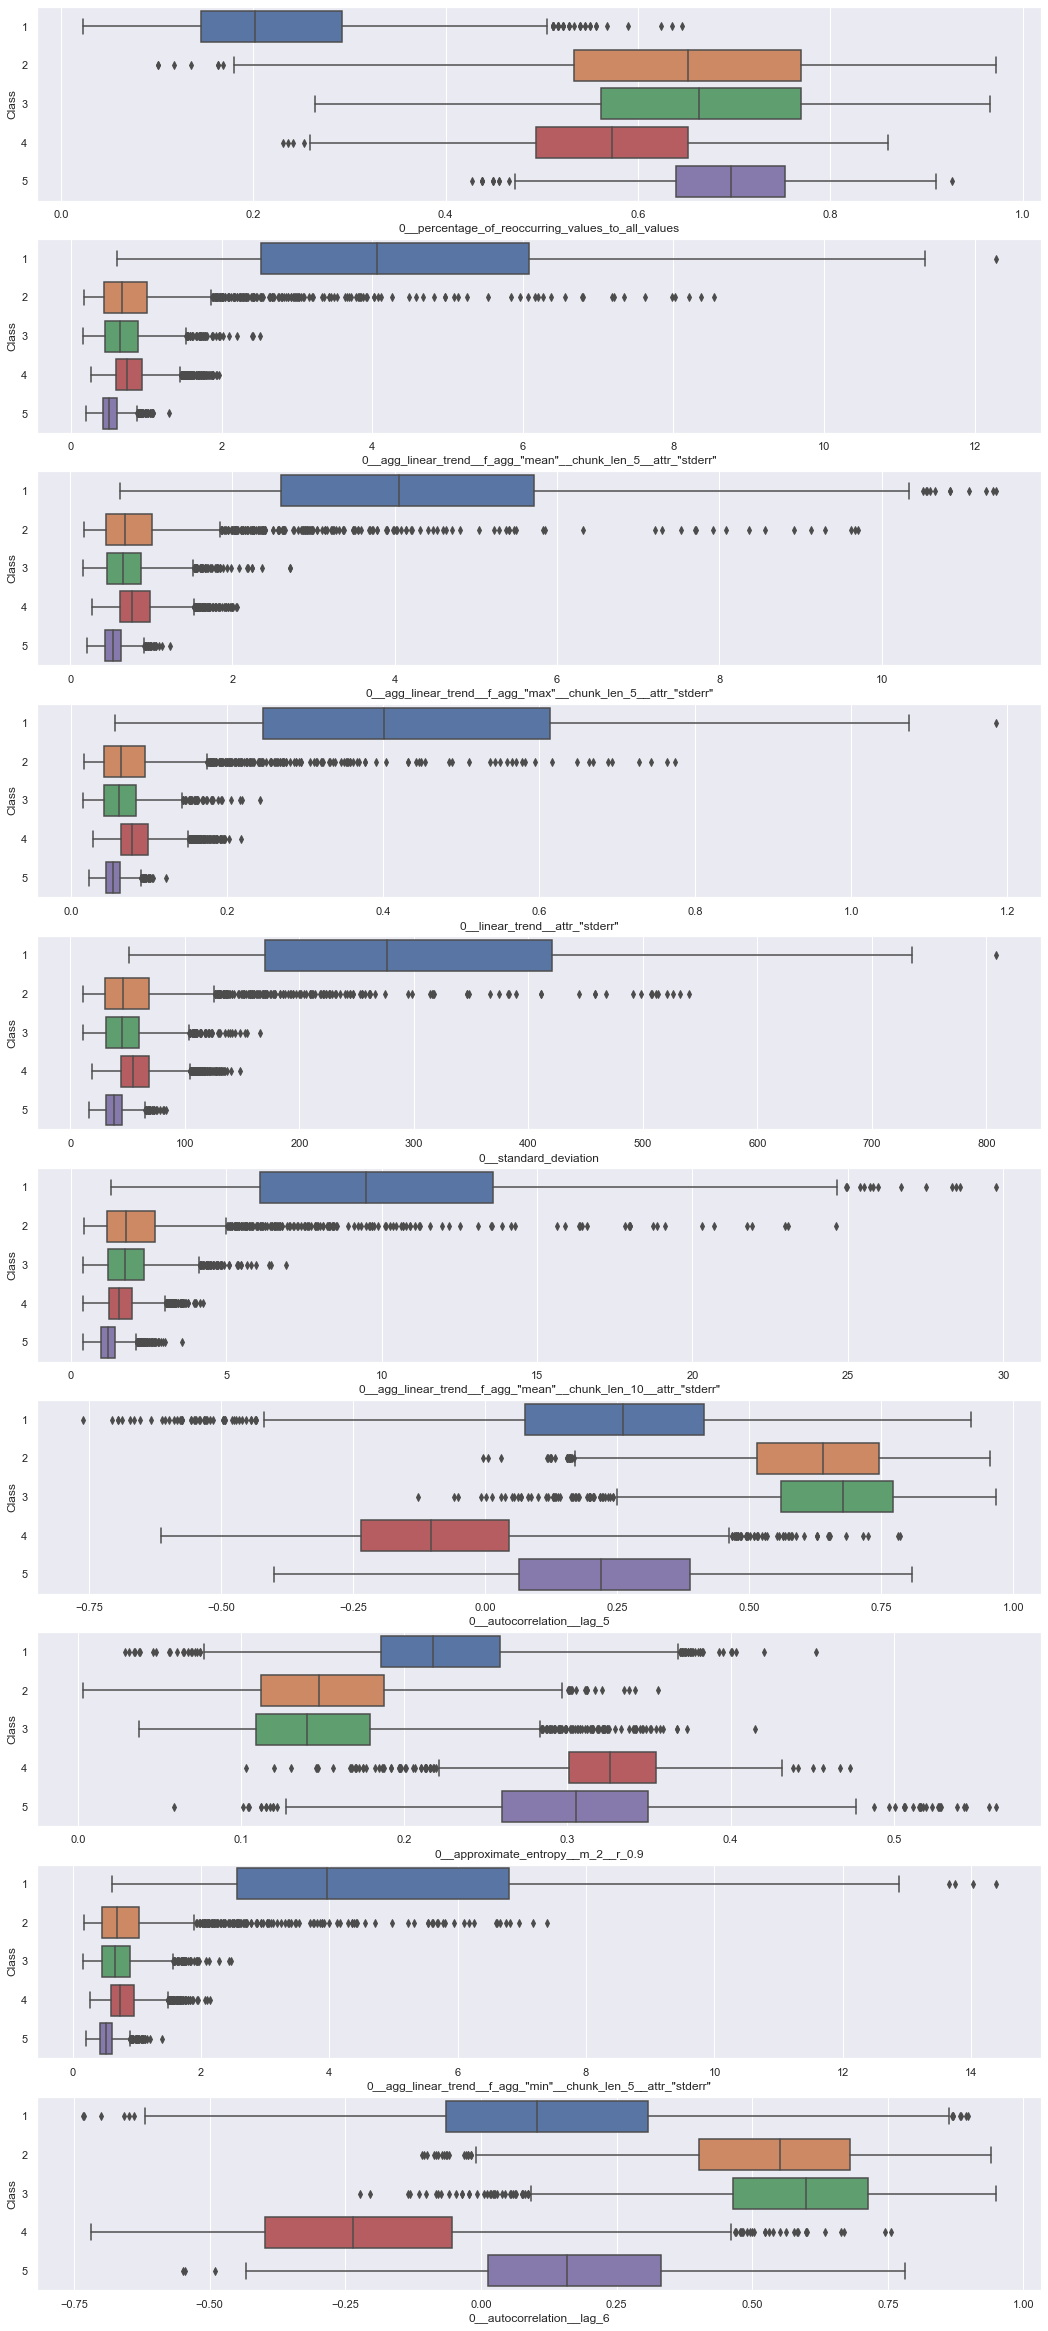

In [153]:
classification, new_df = preprocessing(data, ID, Class, mode = 'multi')
predictors_multi = get_best_predictors(new_df, classification, 10, plot = True)

In [154]:
predictors_multi

['0__percentage_of_reoccurring_values_to_all_values',
 '0__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"',
 '0__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"',
 '0__linear_trend__attr_"stderr"',
 '0__standard_deviation',
 '0__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"',
 '0__autocorrelation__lag_5',
 '0__approximate_entropy__m_2__r_0.9',
 '0__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"stderr"',
 '0__autocorrelation__lag_6']

In [155]:
predictors

['0__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"',
 '0__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"',
 '0__linear_trend__attr_"stderr"',
 '0__standard_deviation',
 '0__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"',
 '0__percentage_of_reoccurring_values_to_all_values',
 '0__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"stderr"',
 '0__quantile__q_0.1',
 '0__quantile__q_0.2',
 '0__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"']

In [156]:
predictors_2

['0__approximate_entropy__m_2__r_0.9',
 '0__approximate_entropy__m_2__r_0.7',
 '0__autocorrelation__lag_4',
 '0__autocorrelation__lag_3',
 '0__autocorrelation__lag_2',
 '0__cid_ce__normalize_True',
 '0__autocorrelation__lag_5',
 '0__approximate_entropy__m_2__r_0.5',
 '0__autocorrelation__lag_6',
 '0__autocorrelation__lag_1']

In [157]:
predictors_3

['0__approximate_entropy__m_2__r_0.1',
 '0__number_peaks__n_1',
 '0__ar_coefficient__k_10__coeff_1',
 '0__fft_coefficient__coeff_9__attr_"abs"',
 '0__ar_coefficient__k_10__coeff_2',
 '0__fft_coefficient__coeff_10__attr_"abs"',
 '0__fft_coefficient__coeff_8__attr_"abs"',
 '0__number_peaks__n_3',
 '0__maximum',
 '0__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"stderr"']

In [158]:
predictors_4

['0__autocorrelation__lag_6',
 '0__autocorrelation__lag_7',
 '0__ar_coefficient__k_10__coeff_2',
 '0__ar_coefficient__k_10__coeff_3',
 '0__autocorrelation__lag_5',
 '0__autocorrelation__lag_8',
 '0__cid_ce__normalize_False',
 '0__mean_abs_change',
 '0__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 '0__absolute_sum_of_changes']

The predictors that will be used to classify the results are selected based on the best predictors obtained above as well as common predictors used such as entropy and variance for the fft data. We also made the effort to select the predictors not just based on what was given in the algorithm by reading through the meaning of the various variables in the module main page. 
For example, agg linear trend is dropped as there is not much significance in the variable.

Do note that the fft data that was calculated in method 2 is also built into the features extraction module. As such, they are accounted for in the best predictor search.

In [159]:
new_predictors = ['0__standard_deviation',
                  '0__mean_abs_change',
                  '0__absolute_sum_of_changes',
                  '0__cid_ce__normalize_True',
                  '0__number_peaks__n_1',
                  '0__number_peaks__n_3',
                  '0__autocorrelation__lag_1',
                  '0__autocorrelation__lag_2',
                  '0__autocorrelation__lag_3',
                  '0__autocorrelation__lag_4',
                  '0__autocorrelation__lag_5',
                  '0__autocorrelation__lag_6',
                  '0__autocorrelation__lag_7',
                  '0__autocorrelation__lag_8',
                  '0__approximate_entropy__m_2__r_0.1',
                  '0__approximate_entropy__m_2__r_0.3',
                  '0__approximate_entropy__m_2__r_0.5',
                  '0__approximate_entropy__m_2__r_0.7',
                  '0__approximate_entropy__m_2__r_0.9',
                  '0__ar_coefficient__k_10__coeff_0',
                  '0__ar_coefficient__k_10__coeff_1',
                  '0__ar_coefficient__k_10__coeff_2',
                  '0__ar_coefficient__k_10__coeff_3',
                  '0__ar_coefficient__k_10__coeff_4',
                  '0__fft_coefficient__coeff_8__attr_"abs"',
                  '0__fft_coefficient__coeff_9__attr_"abs"',
                  '0__fft_coefficient__coeff_10__attr_"abs"',
                  '0__fft_coefficient__coeff_11__attr_"abs"',
                  '0__fft_aggregated__aggtype_"centroid"',
                  '0__fft_aggregated__aggtype_"skew"',
                  '0__fft_aggregated__aggtype_"variance"',
                  '0__fft_aggregated__aggtype_"kurtosis"',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_0',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_1',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_2',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_3',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_4',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_5',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_6',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_7',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_8',
                  '0__energy_ratio_by_chunks__num_segments_10__segment_focus_9']

X_train_new = X_train[new_predictors]
X_test_new = X_test[new_predictors]

In [160]:
X_train_new

,0__standard_deviation,0__mean_abs_change,0__absolute_sum_of_changes,0__cid_ce__normalize_True,0__number_peaks__n_1,0__number_peaks__n_3,0__autocorrelation__lag_1,0__autocorrelation__lag_2,0__autocorrelation__lag_3,0__autocorrelation__lag_4,...,0__energy_ratio_by_chunks__num_segments_10__segment_focus_0,0__energy_ratio_by_chunks__num_segments_10__segment_focus_1,0__energy_ratio_by_chunks__num_segments_10__segment_focus_2,0__energy_ratio_by_chunks__num_segments_10__segment_focus_3,0__energy_ratio_by_chunks__num_segments_10__segment_focus_4,0__energy_ratio_by_chunks__num_segments_10__segment_focus_5,0__energy_ratio_by_chunks__num_segments_10__segment_focus_6,0__energy_ratio_by_chunks__num_segments_10__segment_focus_7,0__energy_ratio_by_chunks__num_segments_10__segment_focus_8,0__energy_ratio_by_chunks__num_segments_10__segment_focus_9
ID,,,,,,,,,,,,,,,,,,,,,
X10.V1.514,25.490225,4.661017,825.0,3.028907,23.0,8.0,0.979448,0.928108,0.850766,0.753482,...,0.082976,0.185658,0.050747,0.174757,0.010474,0.015255,0.154885,0.094718,0.165279,0.065250
X5.V1.324,377.627548,62.536723,11069.0,2.965196,7.0,7.0,0.967425,0.886833,0.770478,0.630867,...,0.150207,0.126386,0.096498,0.074403,0.149779,0.091723,0.069977,0.082398,0.113310,0.045319
X19.V1.272,15.986581,3.310734,586.0,3.485020,24.0,9.0,0.968720,0.911567,0.821942,0.712448,...,0.091652,0.035578,0.012806,0.079270,0.249567,0.344159,0.082692,0.052068,0.027061,0.025148
X3.V1.394,171.382035,39.881356,7059.0,4.638737,15.0,13.0,0.938349,0.789456,0.624498,0.498340,...,0.166936,0.089168,0.022102,0.023512,0.194725,0.166185,0.131892,0.073050,0.057204,0.075226
X11.V1.744,182.746656,36.062147,6383.0,3.469927,11.0,11.0,0.959901,0.855999,0.703854,0.523251,...,0.042341,0.012321,0.089535,0.187776,0.115423,0.033575,0.150993,0.021446,0.019083,0.327507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X18.V1.95,47.972220,17.107345,3028.0,5.828367,18.0,15.0,0.885148,0.615244,0.286016,-0.005191,...,0.178049,0.090785,0.139101,0.090416,0.108029,0.061787,0.112968,0.054981,0.121297,0.042588
X3.V1.66,33.094275,11.180791,1979.0,5.515935,19.0,15.0,0.913600,0.724407,0.499310,0.299884,...,0.126814,0.247544,0.096086,0.028252,0.170245,0.022282,0.182462,0.035492,0.031616,0.059208
X3.V1.504,107.653979,19.293785,3415.0,3.459471,17.0,11.0,0.963422,0.873155,0.749076,0.611965,...,0.041670,0.029758,0.002243,0.218917,0.037608,0.054830,0.014441,0.012131,0.353220,0.235182


# 1) Decision Tree Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7479347826086956

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7369565217391304

Wall time: 400 ms


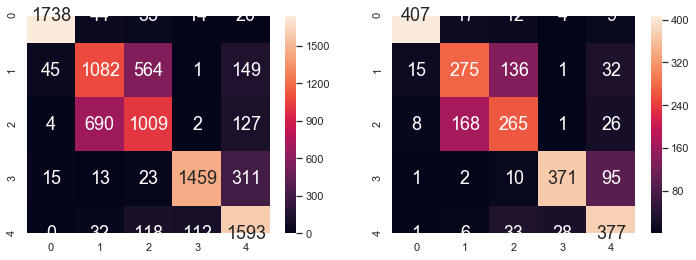

In [161]:
%%time

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train_new, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train_new)
y_test_pred = dectree.predict(X_test_new)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train_new, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test_new, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

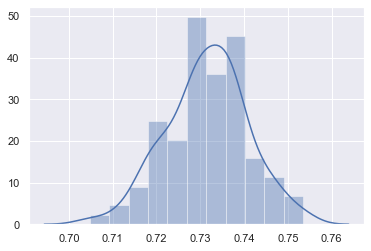

In [162]:
# Runs algorithm 100 times to check consistency of prediction accuracy
model_accuracies = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(data, Class, test_size = 0.20)
    train_index = pd.Series(X_train.index)
    
    X_train_new = X_train[new_predictors]
    X_test_new = X_test[new_predictors]
    
    dectree = DecisionTreeClassifier(max_depth = 5)
    dectree.fit(X_train_new, y_train)
    accuracy = dectree.score(X_test_new, y_test)
    model_accuracies.append(accuracy)
    
sb.distplot(model_accuracies)

From the graph above, we can see that the prediction accuracy is consistent, which suggests that the data is fitted well.

# 2) Gradient Boosting Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9933695652173913

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8039130434782609

Wall time: 13.3 s


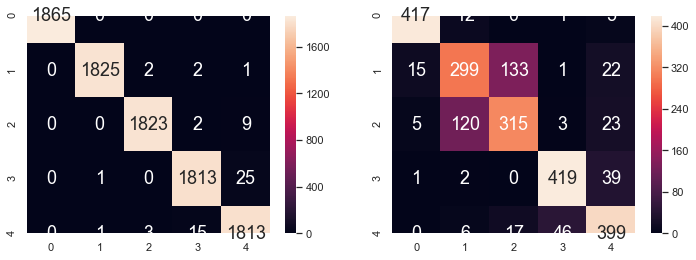

In [163]:
%%time

thresh = 0.5

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=100)

gbc.fit(X_train_new, y_train)

y_train_pred = gbc.predict(X_train_new)
y_test_pred = gbc.predict(X_test_new)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gbc.score(X_train_new, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gbc.score(X_test_new, y_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 3) Random Forest Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.883695652173913

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8043478260869565

Wall time: 516 ms


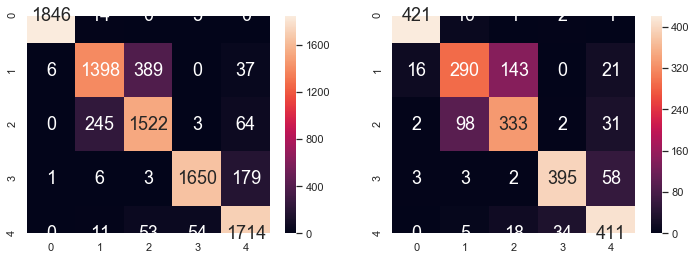

In [164]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 100)
rf.fit(X_train_new, y_train)

y_train_pred = rf.predict(X_train_new)
y_test_pred = rf.predict(X_test_new)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train_new, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test_new, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


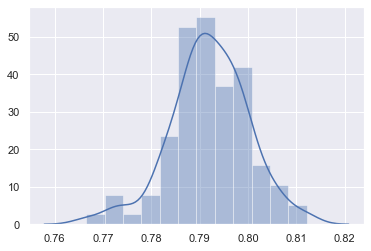

In [165]:
# Runs algorithm 100 times to check consistency of prediction accuracy
model_accuracies = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(data, Class, test_size = 0.20)
    train_index = pd.Series(X_train.index)
    
    X_train_new = X_train[new_predictors]
    X_test_new = X_test[new_predictors]
    
    rf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 100)
    rf.fit(X_train_new, y_train)
    accuracy = rf.score(X_test_new, y_test)
    model_accuracies.append(accuracy)
    
sb.distplot(model_accuracies)

# 4) Extreme Random Forest Classification

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9682608695652174

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8291304347826087

Wall time: 3.74 s


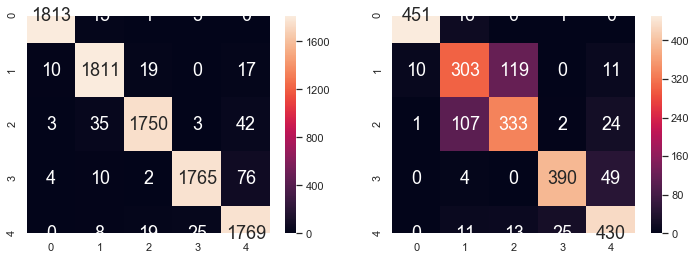

In [166]:
%%time

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)

etc.fit(X_train_new, y_train)

y_train_pred = etc.predict(X_train_new)
y_test_pred = etc.predict(X_test_new)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", etc.score(X_train_new, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", etc.score(X_test_new, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# 5) Extreme Gradient Boosting

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8291304347826087

Wall time: 11.3 s


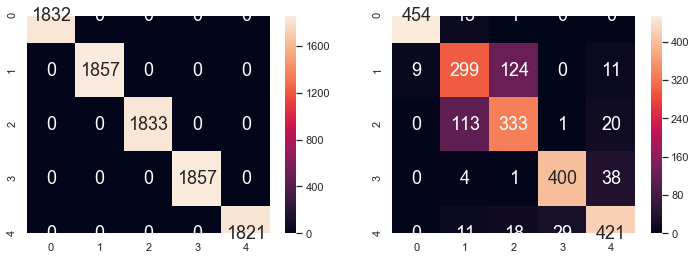

In [167]:
%%time

from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier(depth = 3)

xgbc.fit(X_train_new, y_train)

y_train_pred = xgbc.predict(X_train_new)
y_test_pred = xgbc.predict(X_test_new)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", xgbc.score(X_train_new, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", xgbc.score(X_test_new, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


                                              Accuracy Comparison:

                                All Features      With Selected Features 
    1) Decision Tree                71.9%                     72.6%
    2) Gradient Boosting            79.8%                     79.7%
    3) Random Forest                78.3%                     79.7%
    4) Extreme Random Forest        83.8%                     83.0%
    5) Extreme Gradient Boosting    84.6%                     84.1%


                                               Runtime Comparison:

                                All Selection      With Selected Features 
    1) Decision Tree                3.65s                     443ms
    2) Gradient Boosting            3min 06s                  14.1s
    3) Random Forest                1.67s                     621ms
    4) Extreme Random Forest        1min 17s                  4.56s
    5) Extreme Gradient Boosting    1min 44s                  8.42s

From what we can see, through the use of feature extraction, we are able to greatly reduce the amount of computing time required as the complexity of the data is reduced. While it results in a slightly reduced accuracy, the accuracy is still respectable compared to before. Besides improving the computing time, features selection also reduces the tendency of overfitting, a common phenomenon when conducting classification. 

# Anomaly Detection

In [168]:
features = pd.read_csv('Features.csv')
features = features.astype("float64")

features = drop_constant_column(features)

data = pd.concat([ID,features],axis = 1)
data = data.set_index('ID')
data

,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,0__symmetry_looking__r_0.05,0__symmetry_looking__r_0.1,0__symmetry_looking__r_0.15000000000000002,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,1681484.0,5700.0,0.016429,0.010184,0.129972,130.479532,-0.535129,-6.513932,2.570768,223.4,...,1.0,1.0,1.0,-30065.028409,-9.138002e+04,-5.320209e+04,0.0,0.0,0.0,9160.587426
X15.V1.924,39768644.0,14039.0,-0.098968,-0.281321,0.122362,351.128655,-0.241603,-10.923633,10.968410,536.8,...,0.0,1.0,1.0,-733062.335227,-3.244193e+06,-8.015616e+06,0.0,0.0,0.0,222629.043555
X8.V1.1,692846.0,2458.0,0.067272,-0.001779,0.049609,-25.064327,0.299561,2.569659,2.046035,25.3,...,1.0,1.0,1.0,244.988636,1.943420e+03,5.050994e+03,0.0,0.0,1.0,1952.436182
X16.V1.60,890386.0,1072.0,0.052697,0.023111,0.039498,-62.847953,0.399684,1.145511,0.656791,-48.7,...,1.0,1.0,1.0,5970.090909,8.921672e+03,1.065919e+04,0.0,0.0,0.0,253.564954
X20.V1.54,274368.0,2738.0,0.198667,0.178491,0.024742,19.356725,0.323638,1.539732,1.125383,63.3,...,1.0,1.0,1.0,-3367.215909,-8.528046e+02,-1.028721e+02,5.0,4.0,1.0,1497.148340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,265412.0,980.0,0.430144,0.375553,0.040561,-11.461988,0.641050,4.413829,1.321118,29.7,...,1.0,1.0,1.0,-693.943182,-4.606207e+02,5.070116e+02,2.0,5.0,0.0,1464.480874
X19.V1.354,4739572.0,5685.0,-0.018805,-0.043347,0.119705,77.251462,0.216411,6.159959,6.947409,189.6,...,1.0,1.0,1.0,60923.528409,3.100307e+05,9.007813e+05,0.0,1.0,1.0,26594.612928
X8.V1.28,355312.0,3092.0,0.206047,0.161952,0.064273,94.111111,-0.629980,-4.941176,1.522814,129.6,...,1.0,1.0,1.0,666.522727,5.214046e+03,9.656983e+03,4.0,1.0,0.0,1950.534402


In [169]:
X_ana=data.iloc[:,:]
outliers_fraction = 0.01
X_ana

,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,0__symmetry_looking__r_0.05,0__symmetry_looking__r_0.1,0__symmetry_looking__r_0.15000000000000002,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,1681484.0,5700.0,0.016429,0.010184,0.129972,130.479532,-0.535129,-6.513932,2.570768,223.4,...,1.0,1.0,1.0,-30065.028409,-9.138002e+04,-5.320209e+04,0.0,0.0,0.0,9160.587426
X15.V1.924,39768644.0,14039.0,-0.098968,-0.281321,0.122362,351.128655,-0.241603,-10.923633,10.968410,536.8,...,0.0,1.0,1.0,-733062.335227,-3.244193e+06,-8.015616e+06,0.0,0.0,0.0,222629.043555
X8.V1.1,692846.0,2458.0,0.067272,-0.001779,0.049609,-25.064327,0.299561,2.569659,2.046035,25.3,...,1.0,1.0,1.0,244.988636,1.943420e+03,5.050994e+03,0.0,0.0,1.0,1952.436182
X16.V1.60,890386.0,1072.0,0.052697,0.023111,0.039498,-62.847953,0.399684,1.145511,0.656791,-48.7,...,1.0,1.0,1.0,5970.090909,8.921672e+03,1.065919e+04,0.0,0.0,0.0,253.564954
X20.V1.54,274368.0,2738.0,0.198667,0.178491,0.024742,19.356725,0.323638,1.539732,1.125383,63.3,...,1.0,1.0,1.0,-3367.215909,-8.528046e+02,-1.028721e+02,5.0,4.0,1.0,1497.148340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,265412.0,980.0,0.430144,0.375553,0.040561,-11.461988,0.641050,4.413829,1.321118,29.7,...,1.0,1.0,1.0,-693.943182,-4.606207e+02,5.070116e+02,2.0,5.0,0.0,1464.480874
X19.V1.354,4739572.0,5685.0,-0.018805,-0.043347,0.119705,77.251462,0.216411,6.159959,6.947409,189.6,...,1.0,1.0,1.0,60923.528409,3.100307e+05,9.007813e+05,0.0,1.0,1.0,26594.612928
X8.V1.28,355312.0,3092.0,0.206047,0.161952,0.064273,94.111111,-0.629980,-4.941176,1.522814,129.6,...,1.0,1.0,1.0,666.522727,5.214046e+03,9.656983e+03,4.0,1.0,0.0,1950.534402


In [170]:
from sklearn.ensemble import IsolationForest
from scipy import stats
model = IsolationForest().fit(X_ana)
scores_pred = model.decision_function(X_ana)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [171]:
labels = [('anomaly' if x<threshold else 'normal') for x in scores_pred]
len(labels)

11500

In [172]:
#
index_ana=[]
for i in range(len(labels)):
    if(labels[i]!='normal'):
        index_ana.append(i)
index_ana

[42,
 149,
 328,
 365,
 368,
 450,
 554,
 632,
 726,
 1055,
 1183,
 1279,
 1301,
 1546,
 1622,
 1734,
 1786,
 1969,
 2210,
 2216,
 2227,
 2240,
 2260,
 2560,
 2624,
 2633,
 2646,
 2943,
 2957,
 3100,
 3113,
 3148,
 3381,
 3382,
 3391,
 3441,
 3473,
 3499,
 3651,
 3730,
 3799,
 3941,
 4015,
 4037,
 4191,
 4214,
 4271,
 4359,
 4380,
 4409,
 4774,
 5026,
 5306,
 5310,
 5446,
 5565,
 5589,
 5591,
 5595,
 5645,
 5684,
 6025,
 6388,
 6573,
 6580,
 6581,
 6665,
 6721,
 6780,
 6795,
 7072,
 7143,
 7333,
 7459,
 7513,
 7593,
 7913,
 7916,
 8020,
 8068,
 8167,
 8288,
 8298,
 8312,
 8313,
 8428,
 8741,
 8865,
 9069,
 9153,
 9222,
 9246,
 9255,
 9268,
 9349,
 9377,
 9385,
 9544,
 9553,
 9795,
 9853,
 9904,
 9950,
 9992,
 10114,
 10134,
 10327,
 10469,
 10507,
 10688,
 10755,
 10969,
 11080,
 11292,
 11400]

In [173]:
df=pd.read_csv("data.csv")
count={'1':0,'2':0,'3':0,'4':0,'5':0}
for i in index_ana:
    if(df.iloc[i]['y']==1):
        count['1']+=1
    elif(df.iloc[i]['y']==2):
        count['2']+=1
    elif(df.iloc[i]['y']==3):
        count['3']+=1
    elif(df.iloc[i]['y']==4):
        count['4']+=1
    elif(df.iloc[5]['y']==5):
        count['5']+=1